In [40]:
%pip install torch optuna seaborn

In [41]:
import optuna
import torch
import pandas as pd
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data.csv', encoding='ISO-8859-1')  # Lectura de caracteres o signos especiales del espanol


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701083 entries, 0 to 701082
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Dia                 701083 non-null  object 
 1   Hora                701083 non-null  object 
 2   Latitud Central     701083 non-null  float64
 3   Longitud Central    701083 non-null  float64
 4   Tipo de Via         701083 non-null  object 
 5   Congestion          701083 non-null  object 
 6   Congestion_Numeric  701083 non-null  int64  
 7   Distance            701083 non-null  float64
 8   Duration            701083 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 48.1+ MB


In [43]:
data.describe().T

count       mean        std        min        25%  \
Latitud Central     701083.0 -12.123855   0.045094 -12.225161 -12.159201   
Longitud Central    701083.0 -77.018400   0.031615 -77.110631 -77.034910   
Congestion_Numeric  701083.0   3.983951   9.269304  -1.000000  -1.000000   
Distance            701083.0  42.452196  42.411308   0.000000  10.800000   
Duration            701083.0   7.929850   8.110030   0.000000   2.113000   

                          50%        75%         max  
Latitud Central    -12.111800 -12.086533  -12.051969  
Longitud Central   -77.014755 -76.994466  -76.953908  
Congestion_Numeric   0.000000   4.000000   91.000000  
Distance            27.100000  61.700000  726.300000  
Duration             5.172000  11.227500  165.029000

In [44]:
data.head()

Dia   Hora  Latitud Central  Longitud Central  \
0  Sunday  20:20       -12.218011        -76.977544   
1  Sunday  20:20       -12.219672        -76.976457   
2  Sunday  20:20       -12.220101        -76.975983   
3  Sunday  20:20       -12.214297        -76.982415   
4  Sunday  20:20       -12.217824        -76.978839   

                  Tipo de Via Congestion  Congestion_Numeric  Distance  \
0  carretera panamericana sur    unknown                  -1       7.8   
1  carretera panamericana sur        low                   0      19.3   
2  carretera panamericana sur        low                  17      17.7   
3    avenida caminos del inca        low                   0      19.1   
4    avenida caminos del inca    unknown                  -1      20.9   

   Duration  
0     1.846  
1     0.722  
2     5.536  
3     1.723  
4     5.026

In [ ]:
label_encoder = LabelEncoder()
data['Dia'] = label_encoder.fit_transform(data['Dia'])
data.head()

Dia   Hora  Latitud Central  Longitud Central                 Tipo de Via  \
0    2  20:20       -12.218011        -76.977544  carretera panamericana sur   
1    2  20:20       -12.219672        -76.976457  carretera panamericana sur   
2    2  20:20       -12.220101        -76.975983  carretera panamericana sur   
3    2  20:20       -12.214297        -76.982415    avenida caminos del inca   
4    2  20:20       -12.217824        -76.978839    avenida caminos del inca   

  Congestion  Congestion_Numeric  Distance  Duration  
0    unknown                  -1       7.8     1.846  
1        low                   0      19.3     0.722  
2        low                  17      17.7     5.536  
3        low                   0      19.1     1.723  
4    unknown                  -1      20.9     5.026

In [ ]:
data['Hora'] = pd.to_datetime(data['Hora'], format='%H:%M').dt.hour * 60 + pd.to_datetime(data['Hora'], format='%H:%M').dt.minute
data.head()

Dia  Hora  Latitud Central  Longitud Central                 Tipo de Via  \
0    2  1220       -12.218011        -76.977544  carretera panamericana sur   
1    2  1220       -12.219672        -76.976457  carretera panamericana sur   
2    2  1220       -12.220101        -76.975983  carretera panamericana sur   
3    2  1220       -12.214297        -76.982415    avenida caminos del inca   
4    2  1220       -12.217824        -76.978839    avenida caminos del inca   

  Congestion  Congestion_Numeric  Distance  Duration  
0    unknown                  -1       7.8     1.846  
1        low                   0      19.3     0.722  
2        low                  17      17.7     5.536  
3        low                   0      19.1     1.723  
4    unknown                  -1      20.9     5.026

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701083 entries, 0 to 701082
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Dia                 701083 non-null  int64  
 1   Hora                701083 non-null  int32  
 2   Latitud Central     701083 non-null  float64
 3   Longitud Central    701083 non-null  float64
 4   Tipo de Via         701083 non-null  object 
 5   Congestion          701083 non-null  object 
 6   Congestion_Numeric  701083 non-null  int64  
 7   Distance            701083 non-null  float64
 8   Duration            701083 non-null  float64
dtypes: float64(4), int32(1), int64(2), object(2)
memory usage: 45.5+ MB


In [48]:
data = data.drop(columns='Congestion', axis=1)
data.head()

Dia  Hora  Latitud Central  Longitud Central                 Tipo de Via  \
0    2  1220       -12.218011        -76.977544  carretera panamericana sur   
1    2  1220       -12.219672        -76.976457  carretera panamericana sur   
2    2  1220       -12.220101        -76.975983  carretera panamericana sur   
3    2  1220       -12.214297        -76.982415    avenida caminos del inca   
4    2  1220       -12.217824        -76.978839    avenida caminos del inca   

   Congestion_Numeric  Distance  Duration  
0                  -1       7.8     1.846  
1                   0      19.3     0.722  
2                  17      17.7     5.536  
3                   0      19.1     1.723  
4                  -1      20.9     5.026

In [49]:
df_original = data
df_original.head()

Dia  Hora  Latitud Central  Longitud Central                 Tipo de Via  \
0    2  1220       -12.218011        -76.977544  carretera panamericana sur   
1    2  1220       -12.219672        -76.976457  carretera panamericana sur   
2    2  1220       -12.220101        -76.975983  carretera panamericana sur   
3    2  1220       -12.214297        -76.982415    avenida caminos del inca   
4    2  1220       -12.217824        -76.978839    avenida caminos del inca   

   Congestion_Numeric  Distance  Duration  
0                  -1       7.8     1.846  
1                   0      19.3     0.722  
2                  17      17.7     5.536  
3                   0      19.1     1.723  
4                  -1      20.9     5.026

In [50]:
data = data[data['Congestion_Numeric'] != -1]
data.head()

Dia  Hora  Latitud Central  Longitud Central                 Tipo de Via  \
1    2  1220       -12.219672        -76.976457  carretera panamericana sur   
2    2  1220       -12.220101        -76.975983  carretera panamericana sur   
3    2  1220       -12.214297        -76.982415    avenida caminos del inca   
5    2  1220       -12.219575        -76.977372    avenida caminos del inca   
9    2  1220       -12.216620        -76.980104               motorway_link   

   Congestion_Numeric  Distance  Duration  
1                   0      19.3     0.722  
2                  17      17.7     5.536  
3                   0      19.1     1.723  
5                   0       7.9     0.682  
9                   0      39.0     2.924

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 408901 entries, 1 to 701082
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Dia                 408901 non-null  int64  
 1   Hora                408901 non-null  int32  
 2   Latitud Central     408901 non-null  float64
 3   Longitud Central    408901 non-null  float64
 4   Tipo de Via         408901 non-null  object 
 5   Congestion_Numeric  408901 non-null  int64  
 6   Distance            408901 non-null  float64
 7   Duration            408901 non-null  float64
dtypes: float64(4), int32(1), int64(2), object(1)
memory usage: 26.5+ MB
None

Primeras filas del dataset:
   Dia  Hora  Latitud Central  Longitud Central                 Tipo de Via  \
1    2  1220       -12.219672        -76.976457  carretera panamericana sur   
2    2  1220       -12.220101        -76.975983  carretera panamericana sur   
3    2  1220      

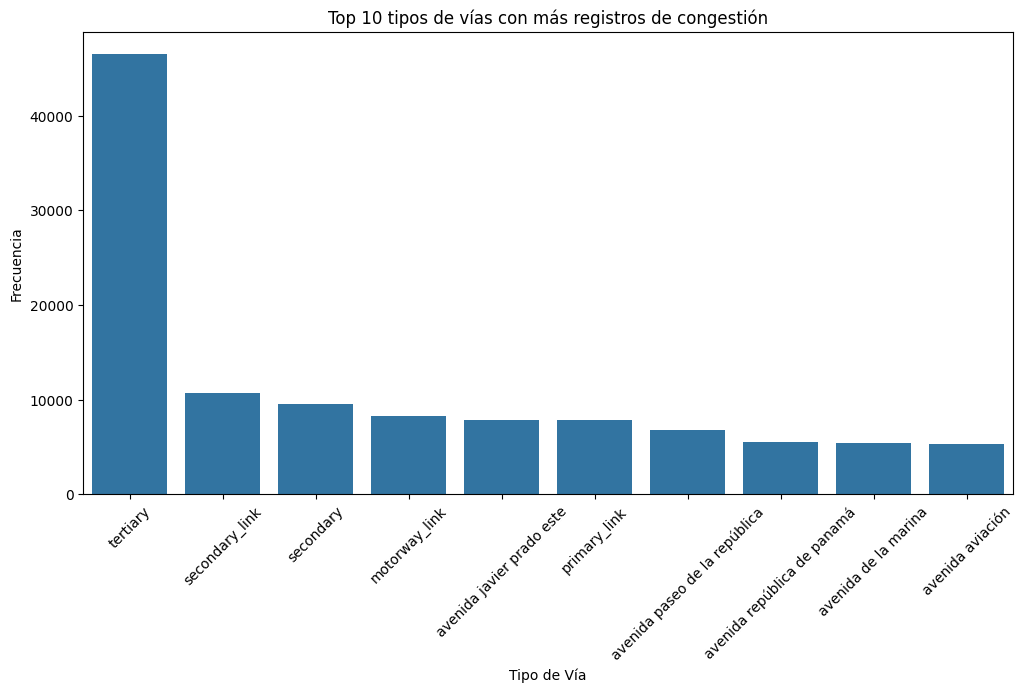

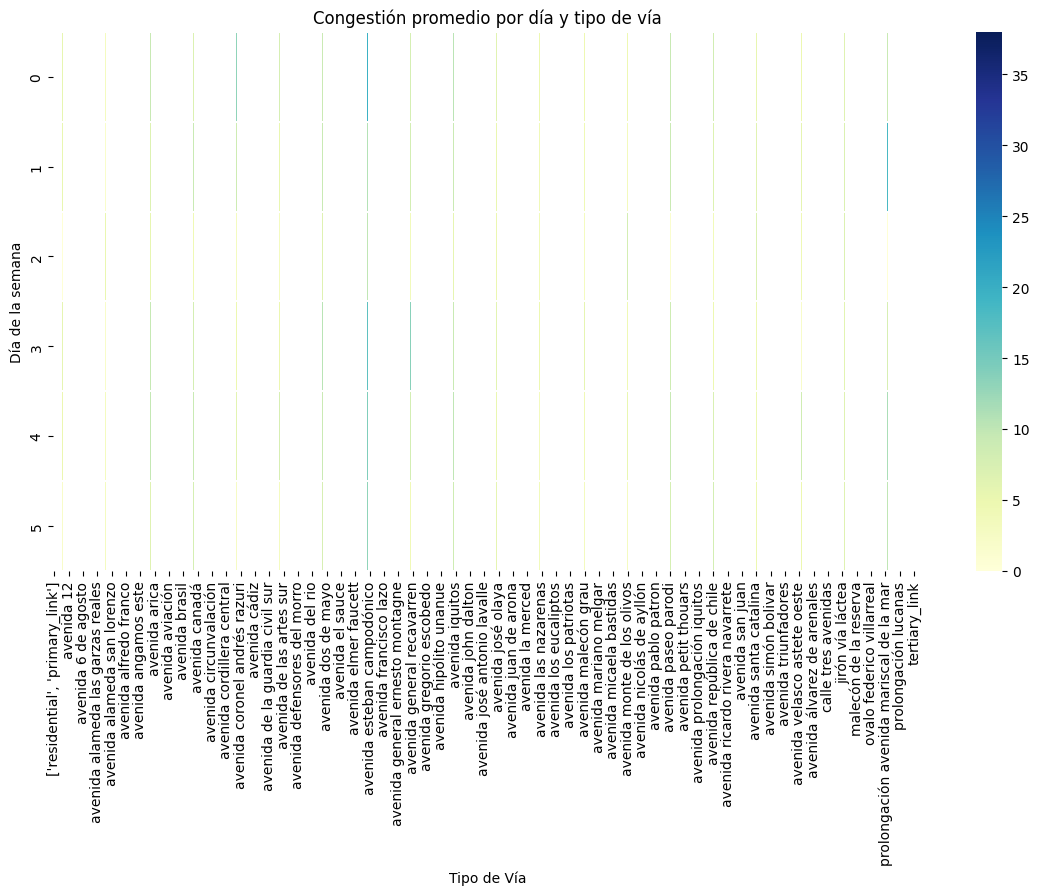

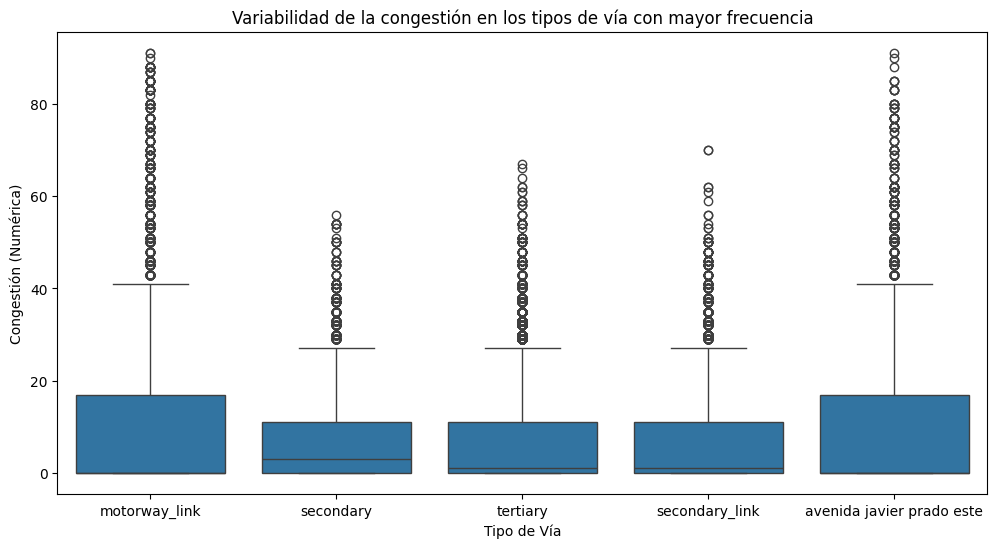

In [ ]:

df = data  

print("Información general del dataset:")
print(df.info())
print("\nPrimeras filas del dataset:")
print(df.head())

via_frecuencia = df['Tipo de Via'].value_counts()
print("\nFrecuencia de aparición por tipo de vía:")
print(via_frecuencia.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=via_frecuencia.head(10).index, y=via_frecuencia.head(10).values)
plt.xticks(rotation=45)
plt.title("Top 10 tipos de vías con más registros de congestión")
plt.xlabel("Tipo de Vía")
plt.ylabel("Frecuencia")
plt.show()

congestion_dia_via = df.groupby(['Dia', 'Tipo de Via'])['Congestion_Numeric'].mean().unstack()

plt.figure(figsize=(14, 7))
sns.heatmap(congestion_dia_via, cmap="YlGnBu", linewidths=0.1)
plt.title("Congestión promedio por día y tipo de vía")
plt.xlabel("Tipo de Vía")
plt.ylabel("Día de la semana")
plt.show()

top_vias = via_frecuencia.head(5).index
df_top_vias = df[df['Tipo de Via'].isin(top_vias)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo de Via', y='Congestion_Numeric', data=df_top_vias)
plt.title("Variabilidad de la congestión en los tipos de vía con mayor frecuencia")
plt.xlabel("Tipo de Vía")
plt.ylabel("Congestión (Numérica)")
plt.show()


In [52]:
data = data[data['Tipo de Via'] == 'avenida javier prado este']
data.head()

Dia  Hora  Latitud Central  Longitud Central                Tipo de Via  \
1290    2  1224       -12.078031        -76.964704  avenida javier prado este   
1292    2  1224       -12.085963        -76.987398  avenida javier prado este   
1293    2  1224       -12.085556        -76.986070  avenida javier prado este   
1986    2  1226       -12.091701        -77.028781  avenida javier prado este   
2009    2  1226       -12.091976        -77.030789  avenida javier prado este   

      Congestion_Numeric  Distance  Duration  
1290                   0      20.9     4.172  
1292                   0      57.9     5.789  
1293                   1      68.5     4.931  
1986                   1     113.7    14.623  
2009                  12      51.6    10.312

In [53]:

X = data[['Dia','Hora','Latitud Central','Longitud Central','Tipo de Via']]
y = data['Congestion_Numeric']

X = pd.get_dummies(X, columns=['Tipo de Via'])

In [54]:
X.sample()

Dia  Hora  Latitud Central  Longitud Central  \
344053    5   621       -12.090673        -77.021166   

        Tipo de Via_avenida javier prado este  
344053                                   True

In [55]:
X.replace({True: 1, False: 0}, inplace=True)

X.head()

<ipython-input-55-f36ac9cdf4a8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace({True: 1, False: 0}, inplace=True)


Dia  Hora  Latitud Central  Longitud Central  \
1290    2  1224       -12.078031        -76.964704   
1292    2  1224       -12.085963        -76.987398   
1293    2  1224       -12.085556        -76.986070   
1986    2  1226       -12.091701        -77.028781   
2009    2  1226       -12.091976        -77.030789   

      Tipo de Via_avenida javier prado este  
1290                                      1  
1292                                      1  
1293                                      1  
1986                                      1  
2009                                      1

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [57]:
X.head()

Dia  Hora  Latitud Central  Longitud Central  \
1290    2  1224       -12.078031        -76.964704   
1292    2  1224       -12.085963        -76.987398   
1293    2  1224       -12.085556        -76.986070   
1986    2  1226       -12.091701        -77.028781   
2009    2  1226       -12.091976        -77.030789   

      Tipo de Via_avenida javier prado este  
1290                                      1  
1292                                      1  
1293                                      1  
1986                                      1  
2009                                      1

[I 2024-11-05 00:02:34,559] A new study created in memory with name: no-name-eacb6b11-52ec-4321-9c56-5b518124ca41
<ipython-input-76-deaa1070b1f1>:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)


Learning Rate:  0.00013875542774597743


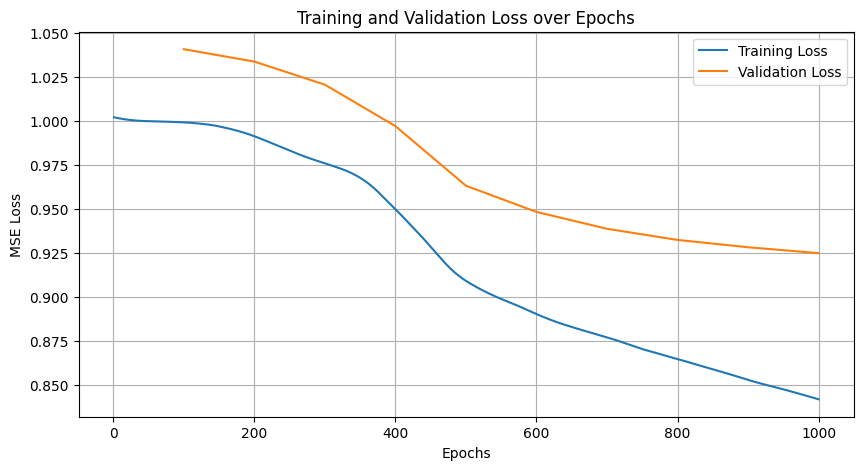

[I 2024-11-05 00:02:43,323] Trial 0 finished with value: 0.9248813390731812 and parameters: {'lr': 0.00013875542774597743, 'num_layers': 7, 'hidden_size': 19}. Best is trial 0 with value: 0.9248813390731812.


Learning Rate:  1.3719622149819427e-05


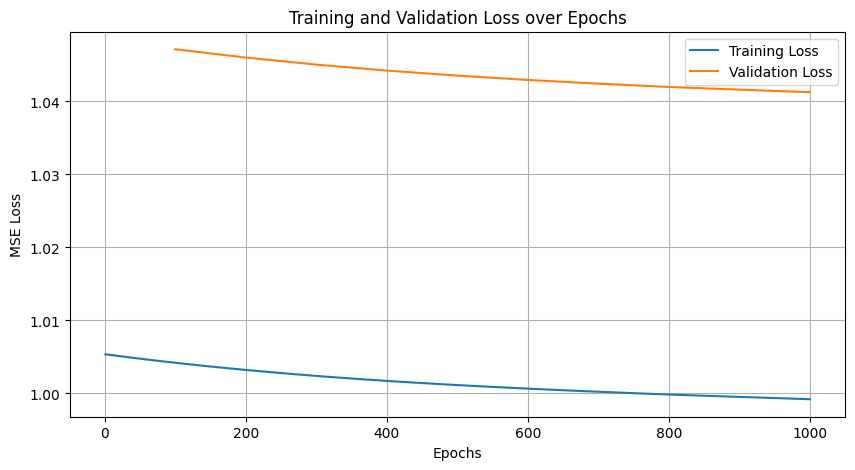

[I 2024-11-05 00:02:51,162] Trial 1 finished with value: 1.0412766933441162 and parameters: {'lr': 1.3719622149819427e-05, 'num_layers': 7, 'hidden_size': 18}. Best is trial 0 with value: 0.9248813390731812.


Learning Rate:  0.0008835957994308202


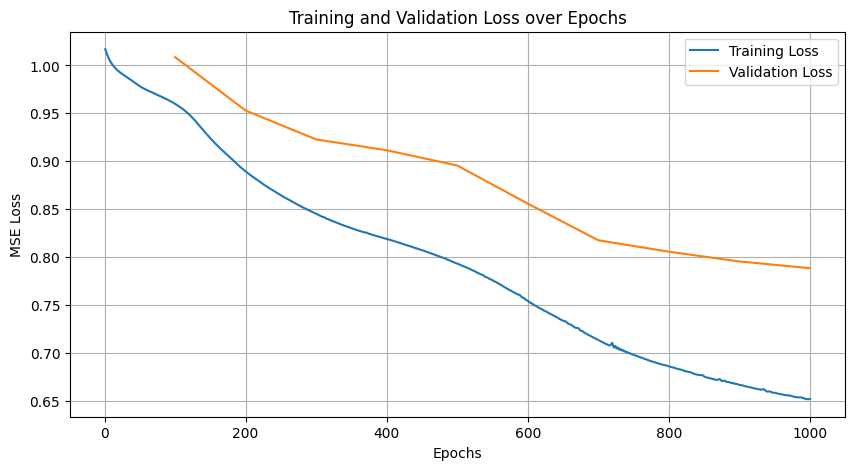

[I 2024-11-05 00:02:55,931] Trial 2 finished with value: 0.7882952094078064 and parameters: {'lr': 0.0008835957994308202, 'num_layers': 4, 'hidden_size': 19}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  4.669911874143275e-05


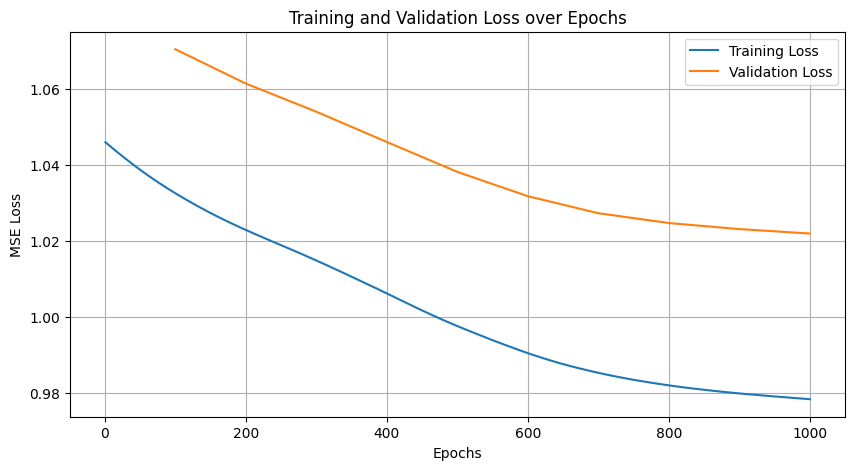

[I 2024-11-05 00:02:59,679] Trial 3 finished with value: 1.0218859910964966 and parameters: {'lr': 4.669911874143275e-05, 'num_layers': 4, 'hidden_size': 14}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  2.058899816042186e-05


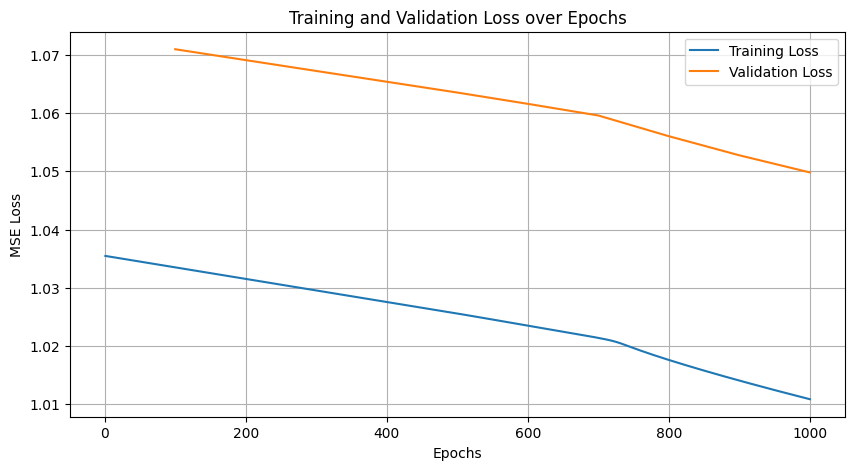

[I 2024-11-05 00:03:06,188] Trial 4 finished with value: 1.0498201847076416 and parameters: {'lr': 2.058899816042186e-05, 'num_layers': 7, 'hidden_size': 16}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.004695143996844367


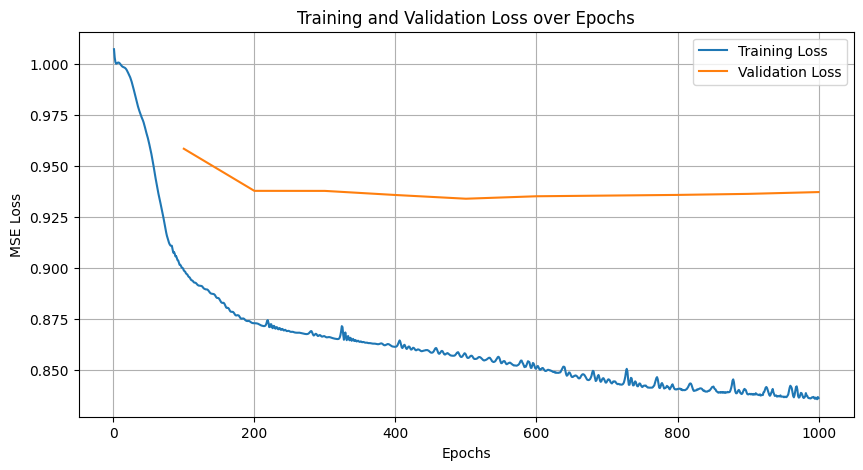

[I 2024-11-05 00:03:10,116] Trial 5 finished with value: 0.9371064901351929 and parameters: {'lr': 0.004695143996844367, 'num_layers': 5, 'hidden_size': 10}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  2.3844459330856964e-05


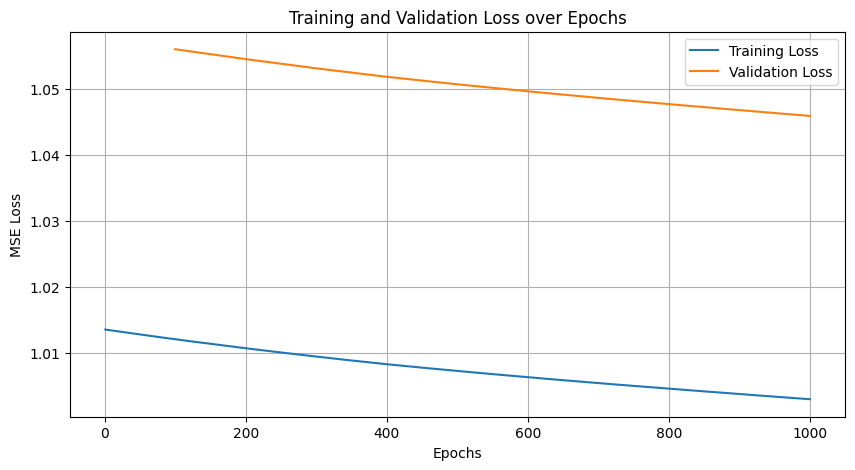

[I 2024-11-05 00:03:14,732] Trial 6 finished with value: 1.0458978414535522 and parameters: {'lr': 2.3844459330856964e-05, 'num_layers': 6, 'hidden_size': 16}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.0002314694066321271


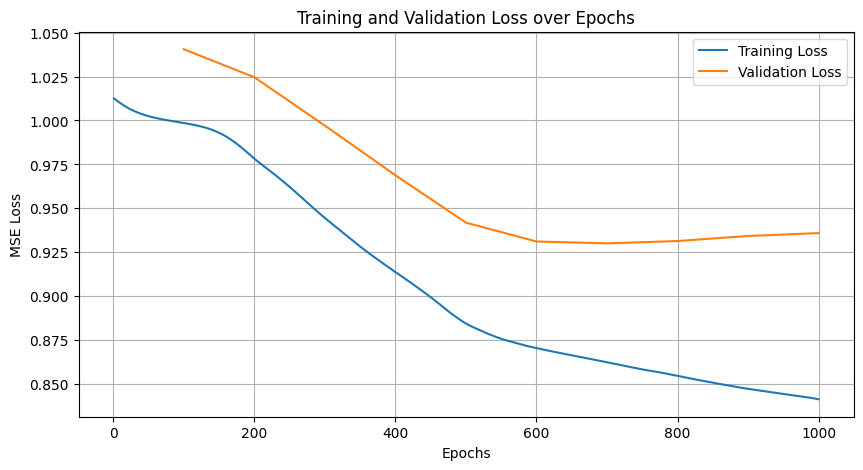

[I 2024-11-05 00:03:22,595] Trial 7 finished with value: 0.9359388947486877 and parameters: {'lr': 0.0002314694066321271, 'num_layers': 6, 'hidden_size': 20}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  1.1507371661485047e-05


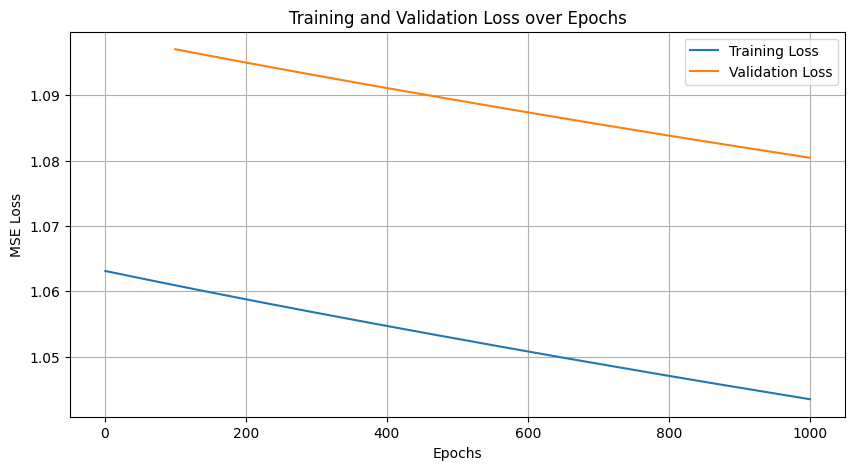

[I 2024-11-05 00:03:27,737] Trial 8 finished with value: 1.0804523229599 and parameters: {'lr': 1.1507371661485047e-05, 'num_layers': 7, 'hidden_size': 16}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.00035689457082013055


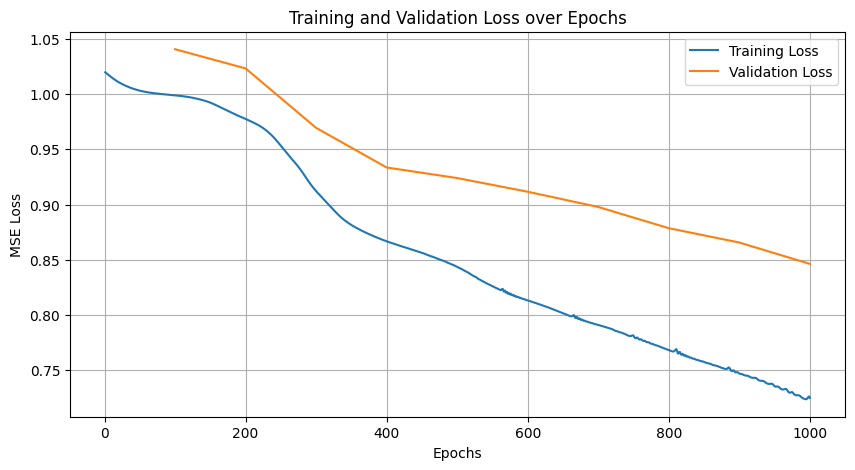

[I 2024-11-05 00:03:36,334] Trial 9 finished with value: 0.8463074564933777 and parameters: {'lr': 0.00035689457082013055, 'num_layers': 7, 'hidden_size': 19}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.0017574807440265362


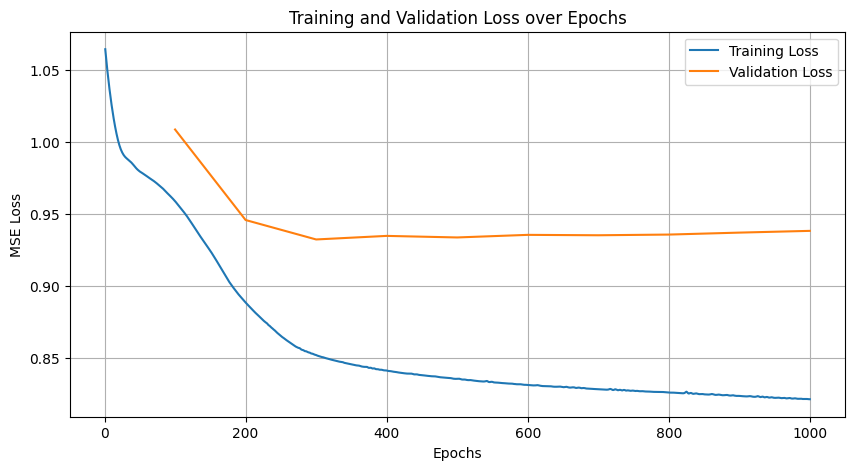

[I 2024-11-05 00:03:40,049] Trial 10 finished with value: 0.938170313835144 and parameters: {'lr': 0.0017574807440265362, 'num_layers': 4, 'hidden_size': 13}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.0009622226694548699


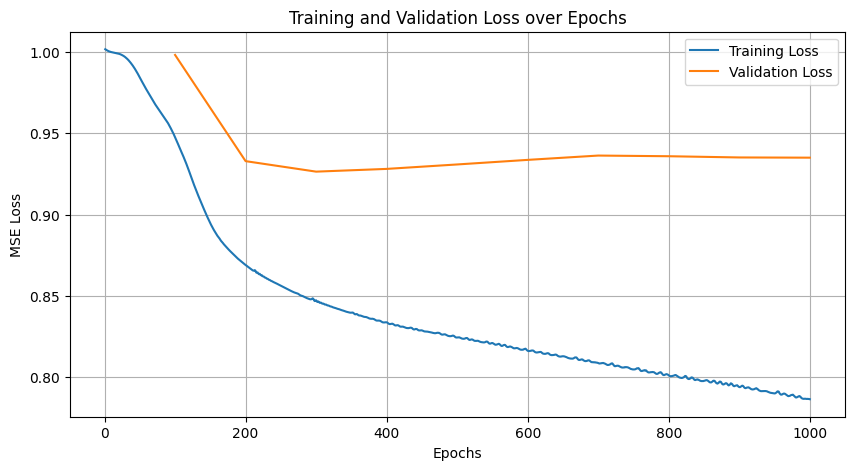

[I 2024-11-05 00:03:46,482] Trial 11 finished with value: 0.9349919557571411 and parameters: {'lr': 0.0009622226694548699, 'num_layers': 5, 'hidden_size': 18}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.000768089791049817


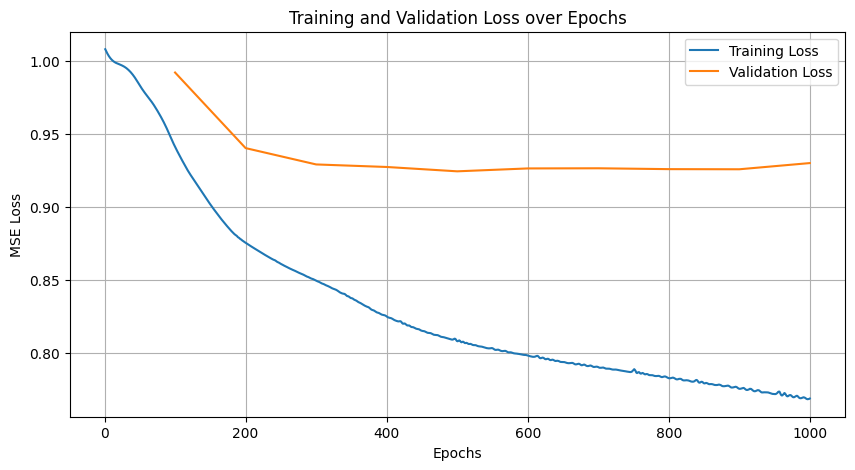

[I 2024-11-05 00:03:52,092] Trial 12 finished with value: 0.9301209449768066 and parameters: {'lr': 0.000768089791049817, 'num_layers': 5, 'hidden_size': 20}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.00010325010010597443


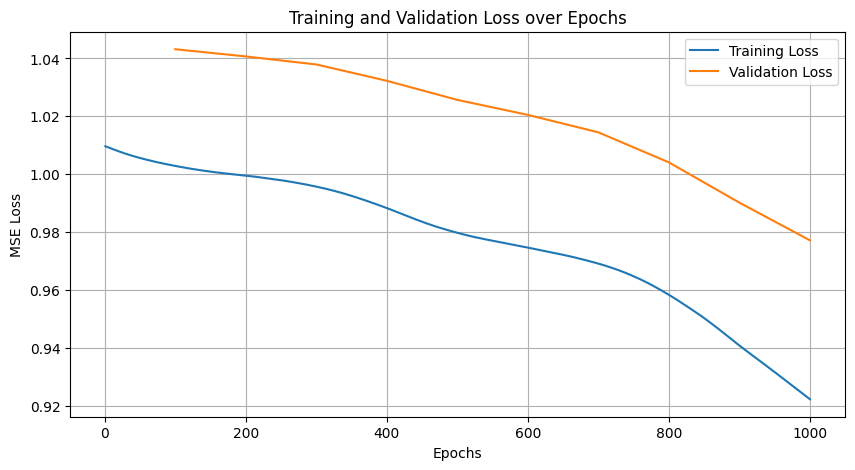

[I 2024-11-05 00:03:59,317] Trial 13 finished with value: 0.9771549105644226 and parameters: {'lr': 0.00010325010010597443, 'num_layers': 6, 'hidden_size': 18}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.0004550095987609419


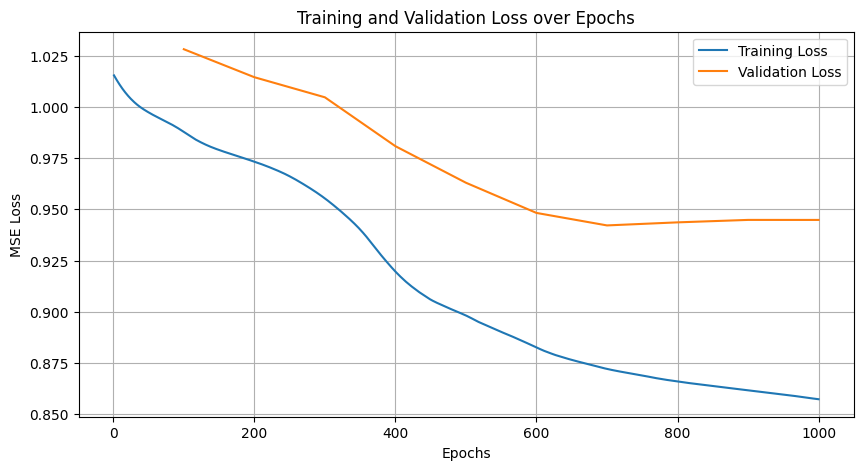

[I 2024-11-05 00:04:02,863] Trial 14 finished with value: 0.9448431730270386 and parameters: {'lr': 0.0004550095987609419, 'num_layers': 4, 'hidden_size': 12}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.009629964361097604


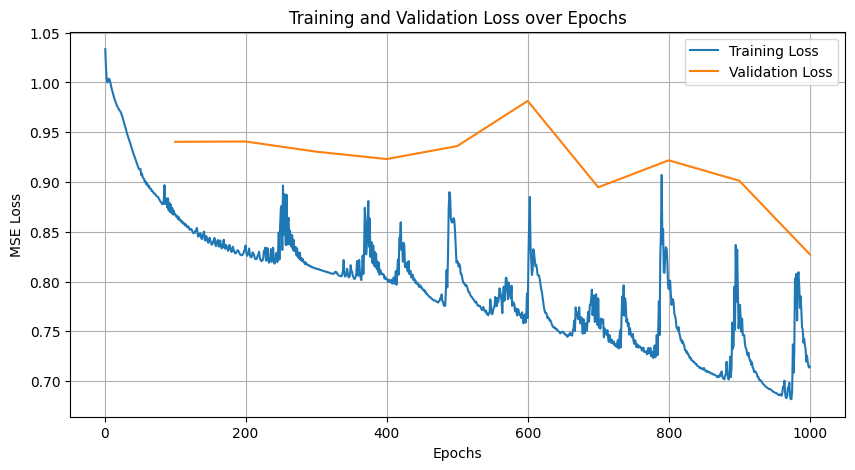

[I 2024-11-05 00:04:07,826] Trial 15 finished with value: 0.827321469783783 and parameters: {'lr': 0.009629964361097604, 'num_layers': 5, 'hidden_size': 17}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.008996744690465373


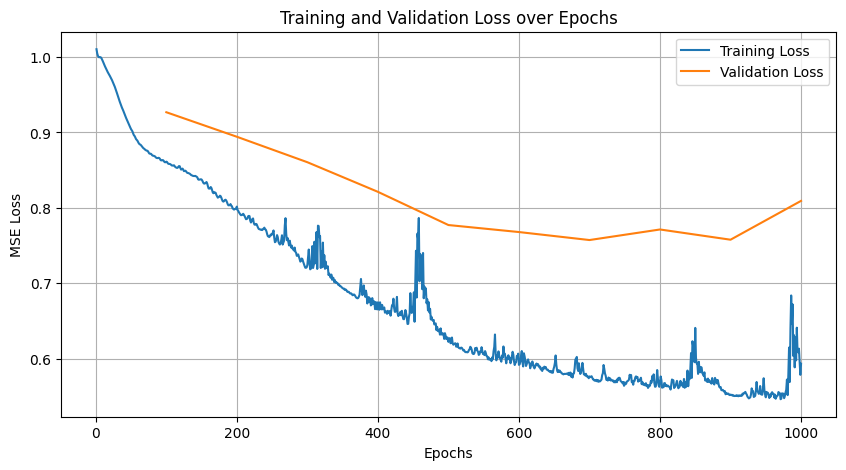

[I 2024-11-05 00:04:13,354] Trial 16 finished with value: 0.8092798590660095 and parameters: {'lr': 0.008996744690465373, 'num_layers': 4, 'hidden_size': 17}. Best is trial 2 with value: 0.7882952094078064.


Learning Rate:  0.002816777135610145


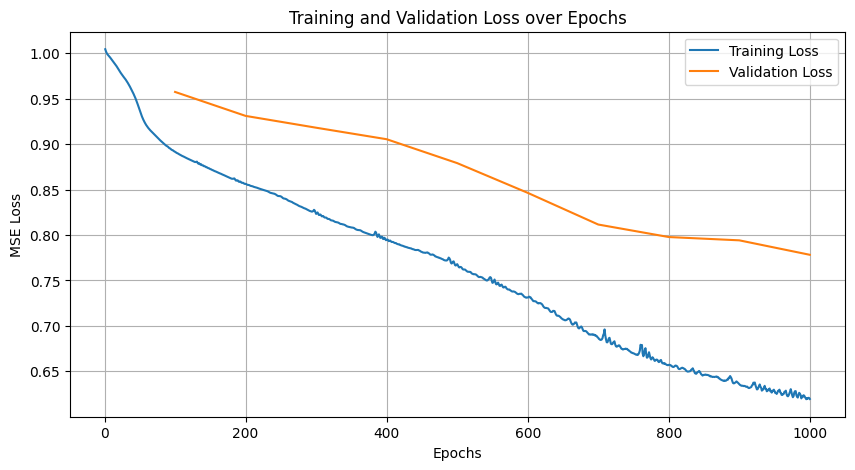

[I 2024-11-05 00:04:17,213] Trial 17 finished with value: 0.7781985402107239 and parameters: {'lr': 0.002816777135610145, 'num_layers': 4, 'hidden_size': 15}. Best is trial 17 with value: 0.7781985402107239.


Learning Rate:  0.0022840315952978515


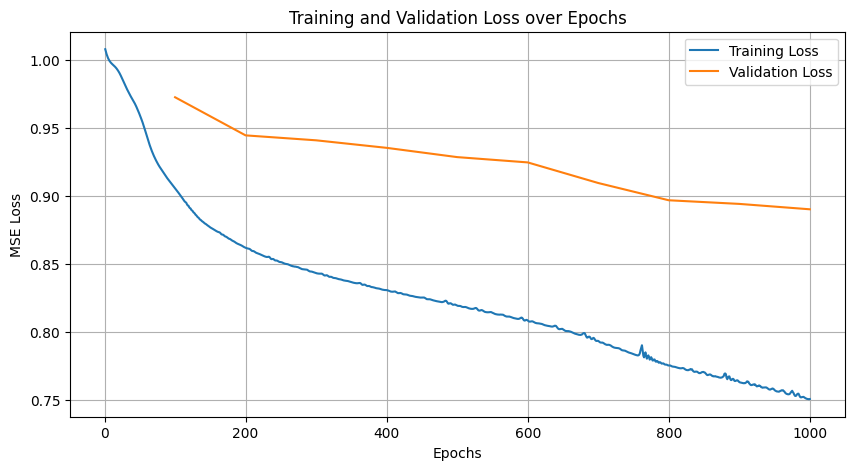

[I 2024-11-05 00:04:20,908] Trial 18 finished with value: 0.8899351954460144 and parameters: {'lr': 0.0022840315952978515, 'num_layers': 4, 'hidden_size': 14}. Best is trial 17 with value: 0.7781985402107239.


Learning Rate:  0.00274407325946202


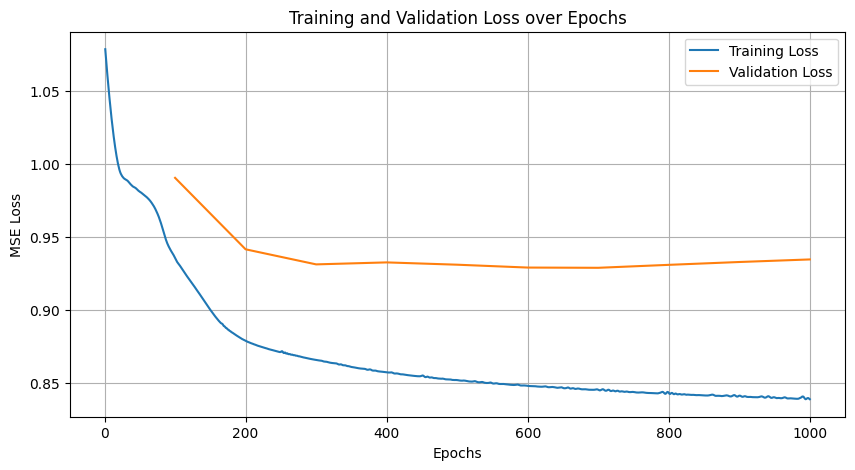

[I 2024-11-05 00:04:24,668] Trial 19 finished with value: 0.9345202445983887 and parameters: {'lr': 0.00274407325946202, 'num_layers': 4, 'hidden_size': 11}. Best is trial 17 with value: 0.7781985402107239.


Learning Rate:  0.0010757186648039491


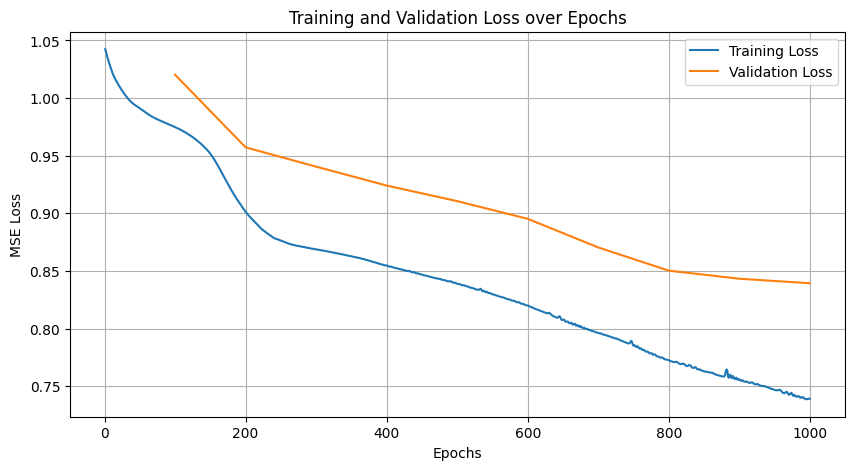

[I 2024-11-05 00:04:29,946] Trial 20 finished with value: 0.8393648862838745 and parameters: {'lr': 0.0010757186648039491, 'num_layers': 5, 'hidden_size': 15}. Best is trial 17 with value: 0.7781985402107239.


Learning Rate:  0.007847721021680664


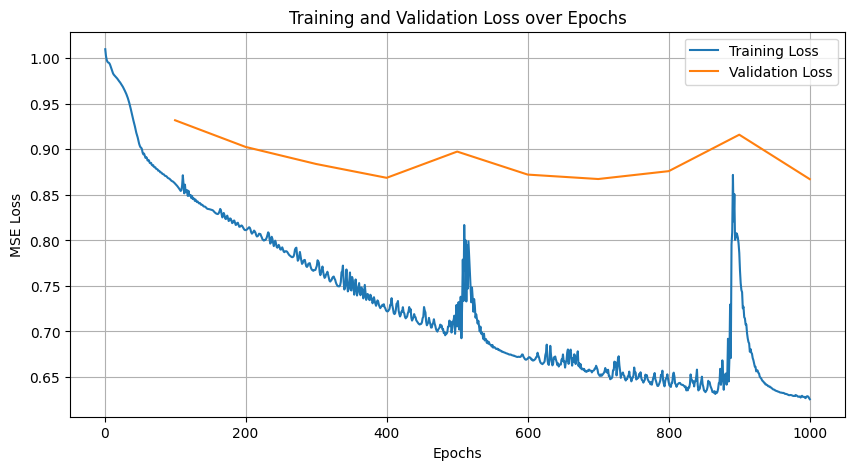

[I 2024-11-05 00:04:34,113] Trial 21 finished with value: 0.8672752380371094 and parameters: {'lr': 0.007847721021680664, 'num_layers': 4, 'hidden_size': 17}. Best is trial 17 with value: 0.7781985402107239.


Learning Rate:  0.004708074389923394


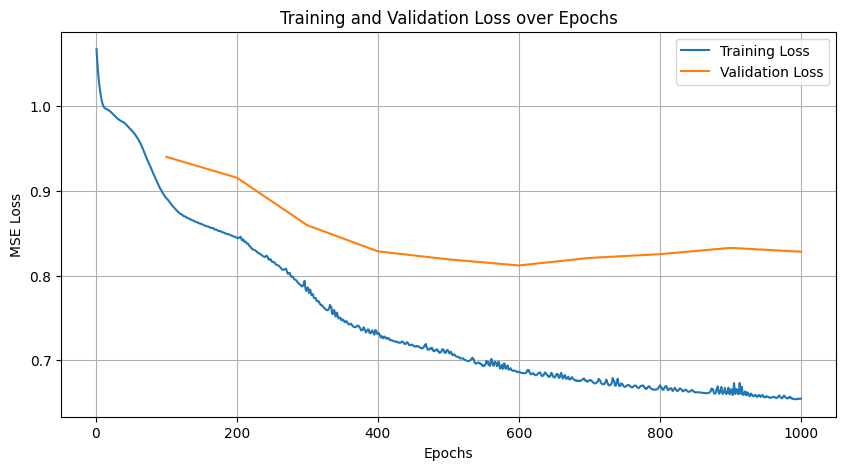

[I 2024-11-05 00:04:38,594] Trial 22 finished with value: 0.8281988501548767 and parameters: {'lr': 0.004708074389923394, 'num_layers': 4, 'hidden_size': 15}. Best is trial 17 with value: 0.7781985402107239.


Learning Rate:  0.004376752124370913


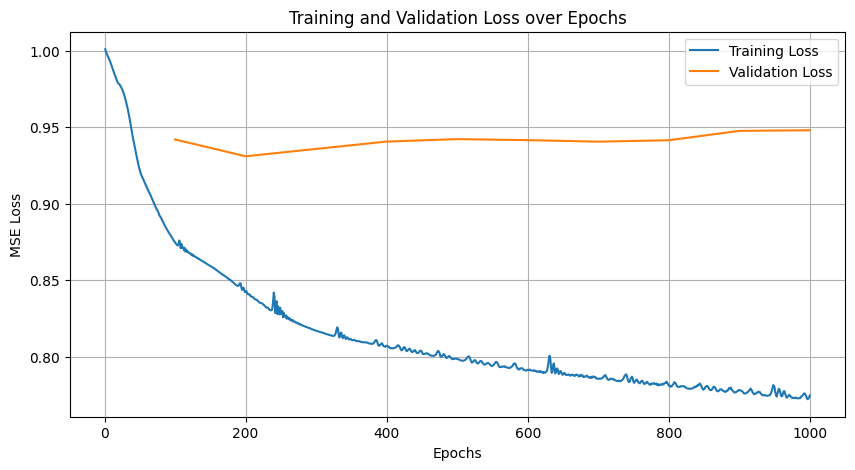

[I 2024-11-05 00:04:43,444] Trial 23 finished with value: 0.947982907295227 and parameters: {'lr': 0.004376752124370913, 'num_layers': 4, 'hidden_size': 17}. Best is trial 17 with value: 0.7781985402107239.


Learning Rate:  0.0018682266450564338


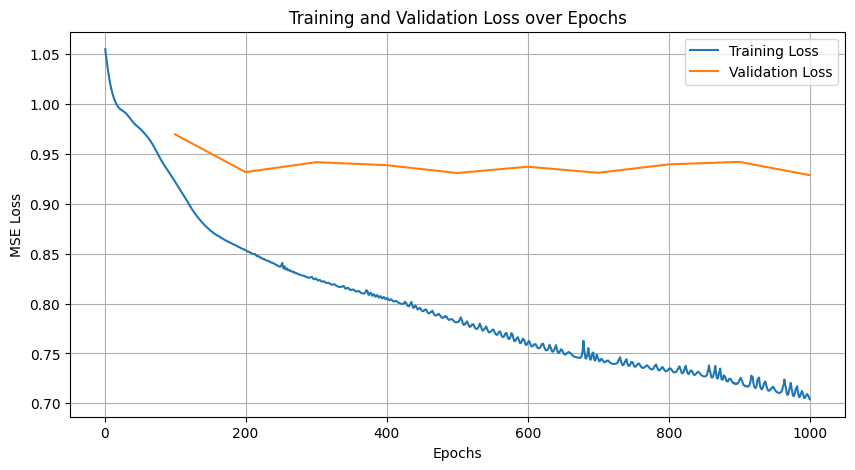

[I 2024-11-05 00:04:48,839] Trial 24 finished with value: 0.9287796020507812 and parameters: {'lr': 0.0018682266450564338, 'num_layers': 5, 'hidden_size': 19}. Best is trial 17 with value: 0.7781985402107239.


Learning Rate:  0.006222138916142876


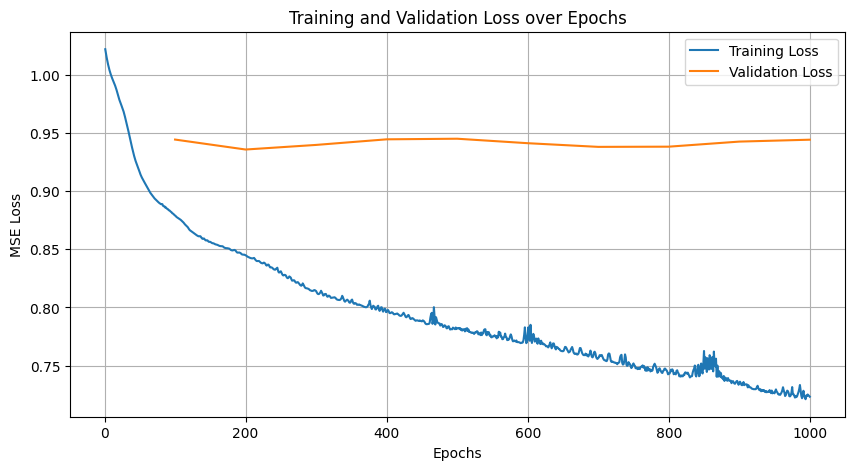

[I 2024-11-05 00:04:53,580] Trial 25 finished with value: 0.9441732168197632 and parameters: {'lr': 0.006222138916142876, 'num_layers': 4, 'hidden_size': 14}. Best is trial 17 with value: 0.7781985402107239.


Learning Rate:  0.0029625199719290514


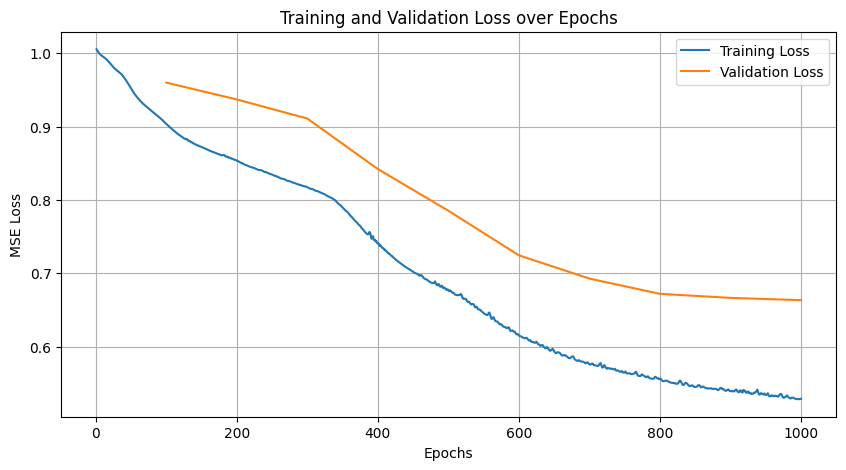

[I 2024-11-05 00:04:57,577] Trial 26 finished with value: 0.6633238196372986 and parameters: {'lr': 0.0029625199719290514, 'num_layers': 4, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0012141287897650072


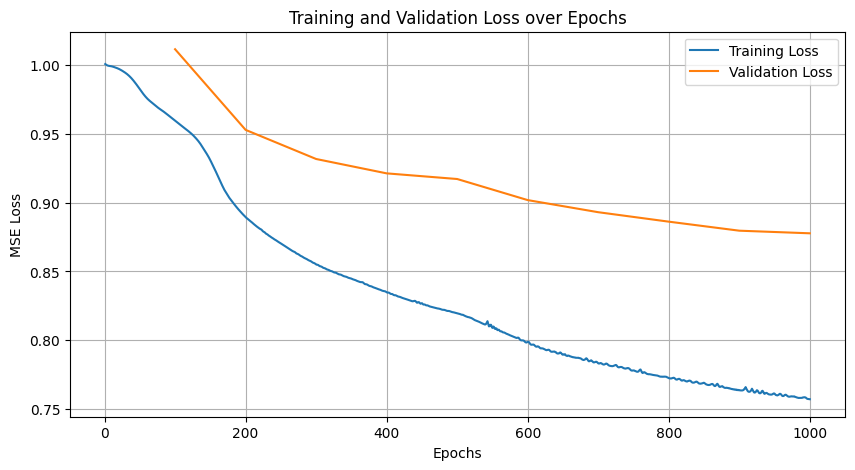

[I 2024-11-05 00:05:01,804] Trial 27 finished with value: 0.8777781128883362 and parameters: {'lr': 0.0012141287897650072, 'num_layers': 5, 'hidden_size': 13}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0006064325307302161


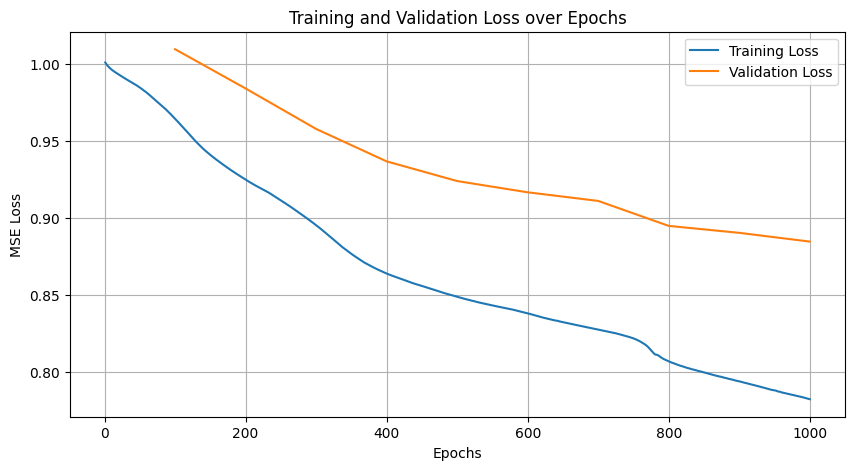

[I 2024-11-05 00:05:06,477] Trial 28 finished with value: 0.8846220970153809 and parameters: {'lr': 0.0006064325307302161, 'num_layers': 4, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.00020219091804455687


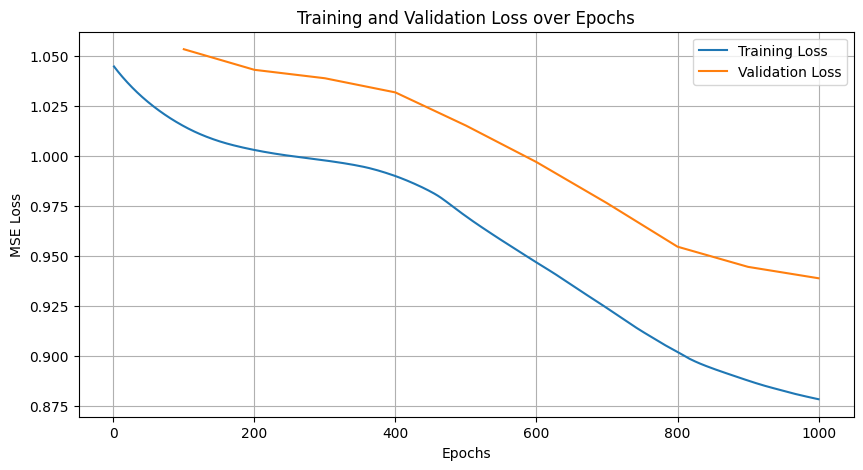

[I 2024-11-05 00:05:11,090] Trial 29 finished with value: 0.938747227191925 and parameters: {'lr': 0.00020219091804455687, 'num_layers': 5, 'hidden_size': 13}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.003298508887491521


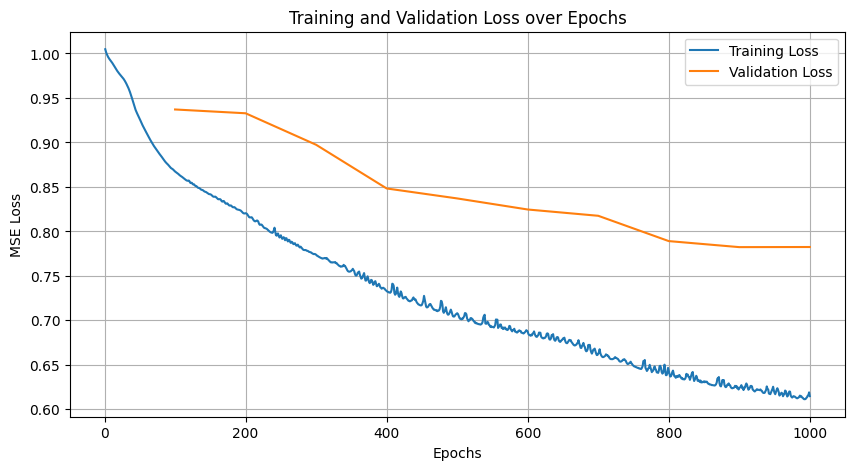

[I 2024-11-05 00:05:14,528] Trial 30 finished with value: 0.7824565172195435 and parameters: {'lr': 0.003298508887491521, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.003055690640286892


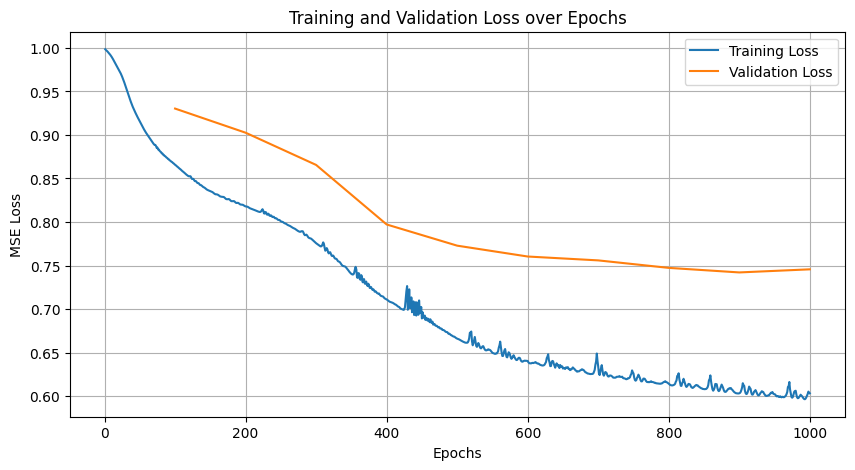

[I 2024-11-05 00:05:19,577] Trial 31 finished with value: 0.7456066608428955 and parameters: {'lr': 0.003055690640286892, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0033133435181588594


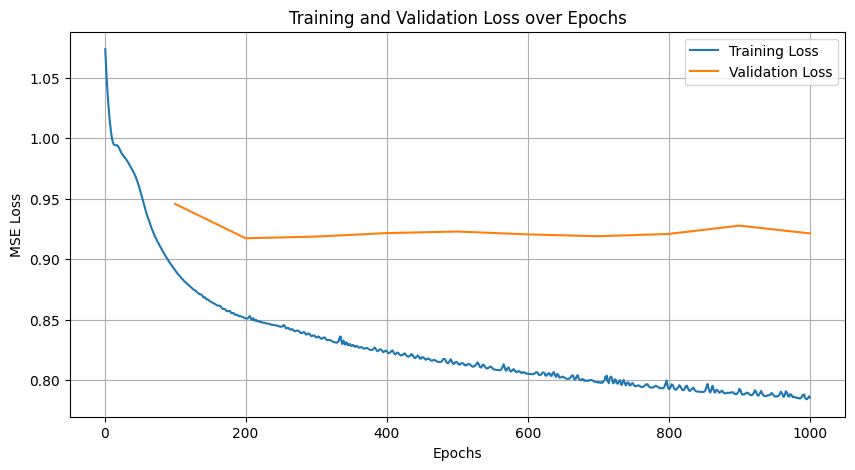

[I 2024-11-05 00:05:23,731] Trial 32 finished with value: 0.9212720394134521 and parameters: {'lr': 0.0033133435181588594, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0032916965077518876


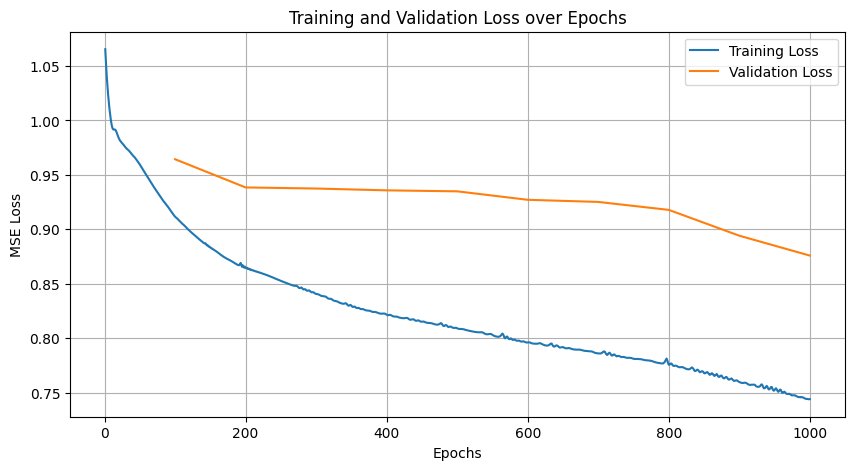

[I 2024-11-05 00:05:27,602] Trial 33 finished with value: 0.8759090304374695 and parameters: {'lr': 0.0032916965077518876, 'num_layers': 4, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0014443049505438123


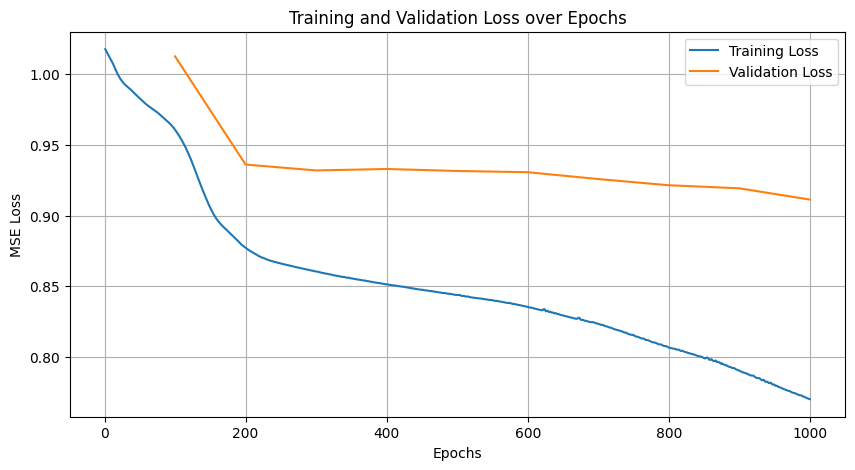

[I 2024-11-05 00:05:31,608] Trial 34 finished with value: 0.911322295665741 and parameters: {'lr': 0.0014443049505438123, 'num_layers': 4, 'hidden_size': 14}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.002369745884391695


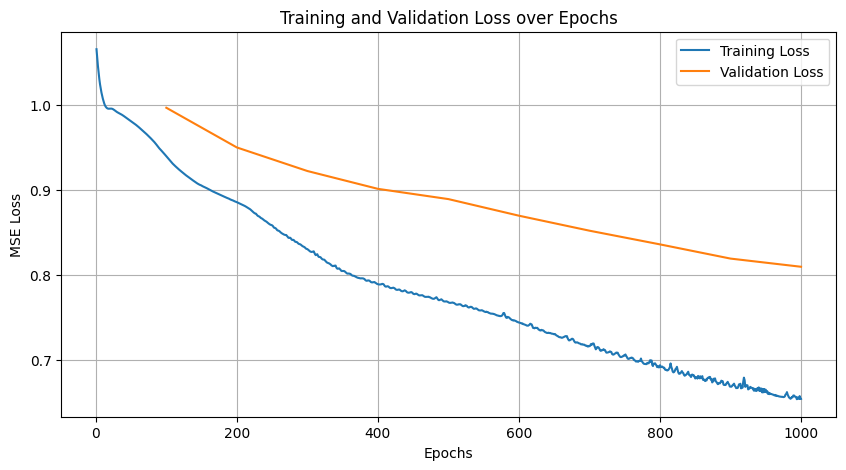

[I 2024-11-05 00:05:36,113] Trial 35 finished with value: 0.8097600936889648 and parameters: {'lr': 0.002369745884391695, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.005340319706049751


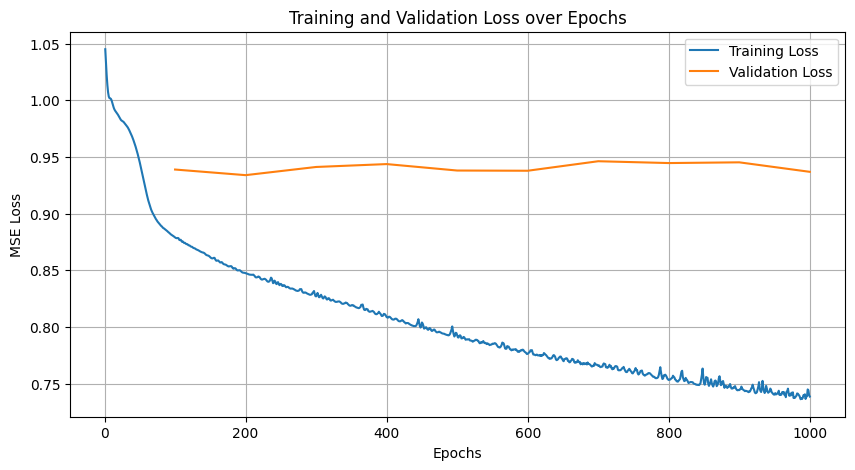

[I 2024-11-05 00:05:40,029] Trial 36 finished with value: 0.9369116425514221 and parameters: {'lr': 0.005340319706049751, 'num_layers': 4, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.003482686472986071


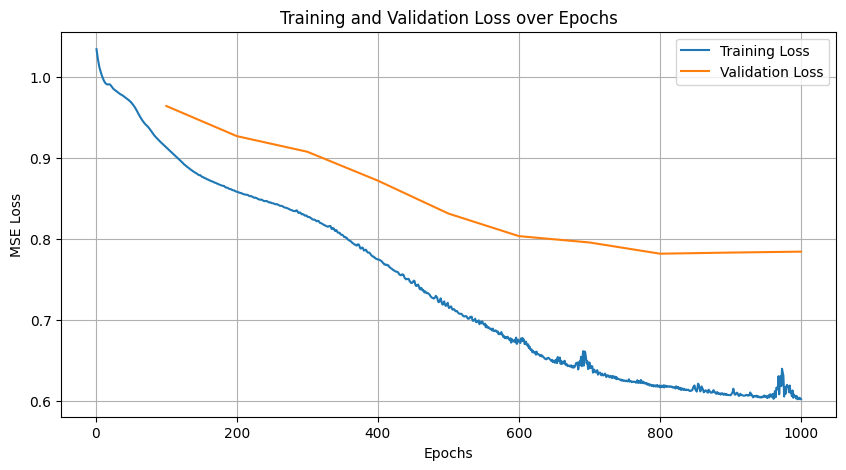

[I 2024-11-05 00:05:44,489] Trial 37 finished with value: 0.7842434644699097 and parameters: {'lr': 0.003482686472986071, 'num_layers': 5, 'hidden_size': 14}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.00010601487824192275


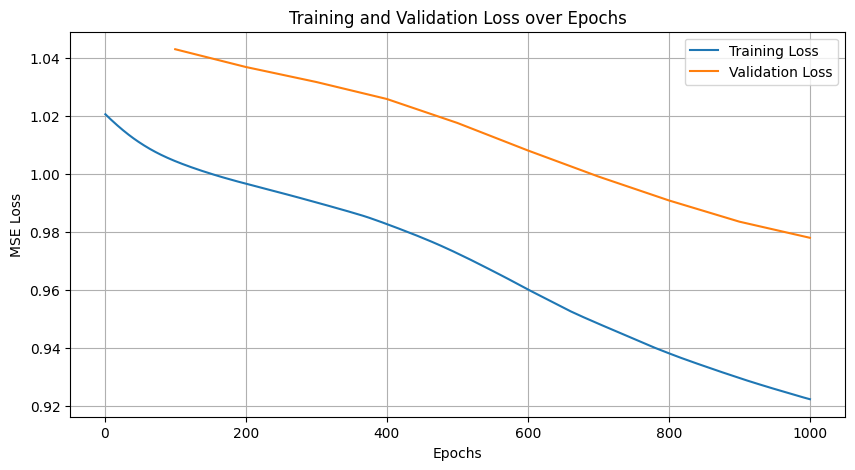

[I 2024-11-05 00:05:49,070] Trial 38 finished with value: 0.9779485464096069 and parameters: {'lr': 0.00010601487824192275, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.001539987742220843


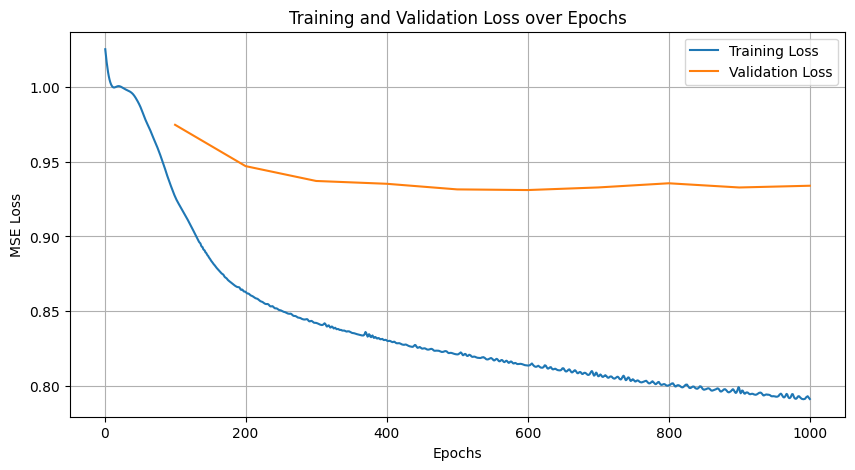

[I 2024-11-05 00:05:54,841] Trial 39 finished with value: 0.9339240789413452 and parameters: {'lr': 0.001539987742220843, 'num_layers': 6, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.000619960059902696


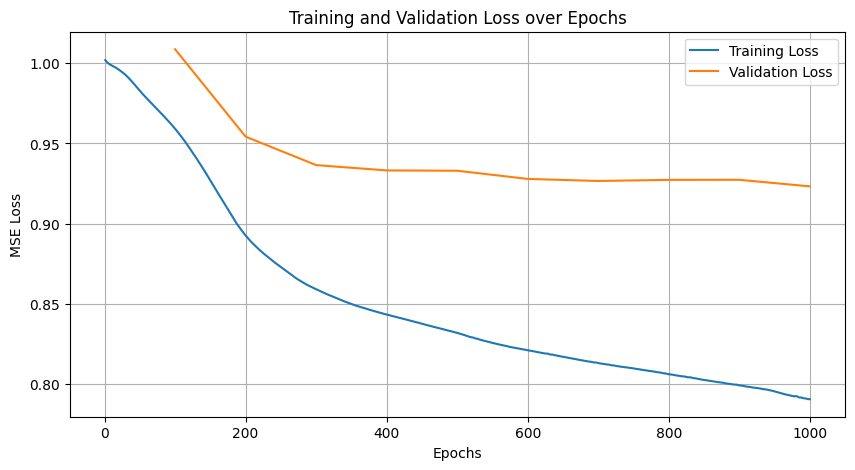

[I 2024-11-05 00:05:59,334] Trial 40 finished with value: 0.9232227802276611 and parameters: {'lr': 0.000619960059902696, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.003687047009668307


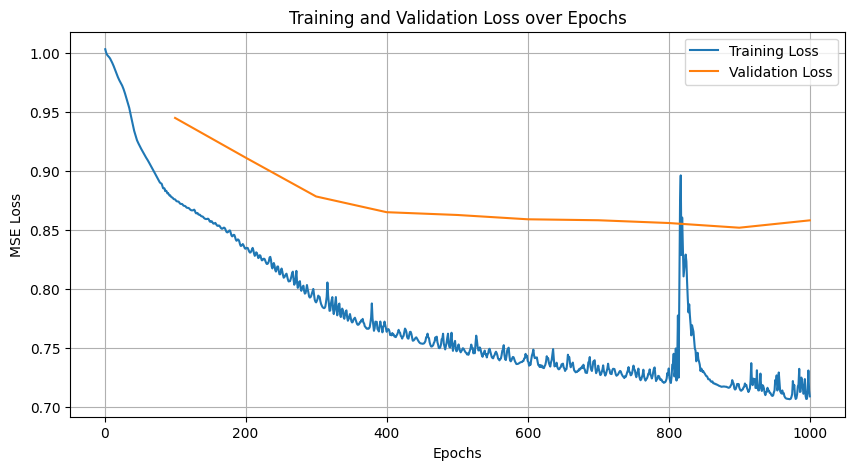

[I 2024-11-05 00:06:04,764] Trial 41 finished with value: 0.8582799434661865 and parameters: {'lr': 0.003687047009668307, 'num_layers': 5, 'hidden_size': 14}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0068065554144753895


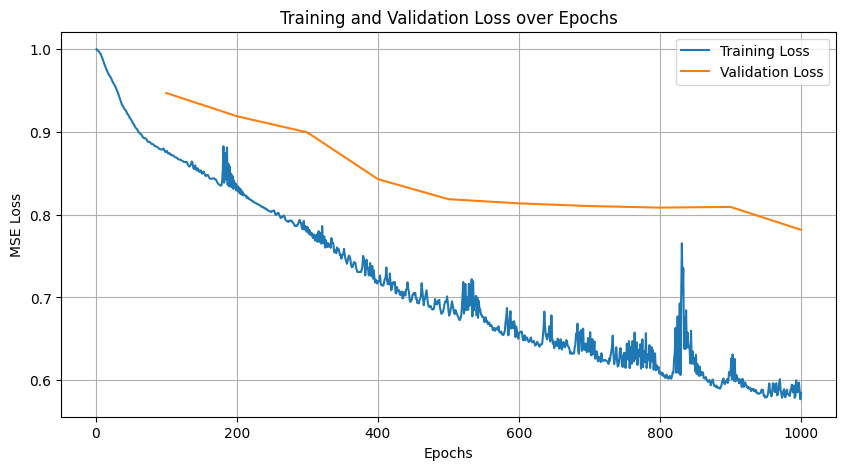

[I 2024-11-05 00:06:09,206] Trial 42 finished with value: 0.7817412614822388 and parameters: {'lr': 0.0068065554144753895, 'num_layers': 5, 'hidden_size': 14}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.006640132931953355


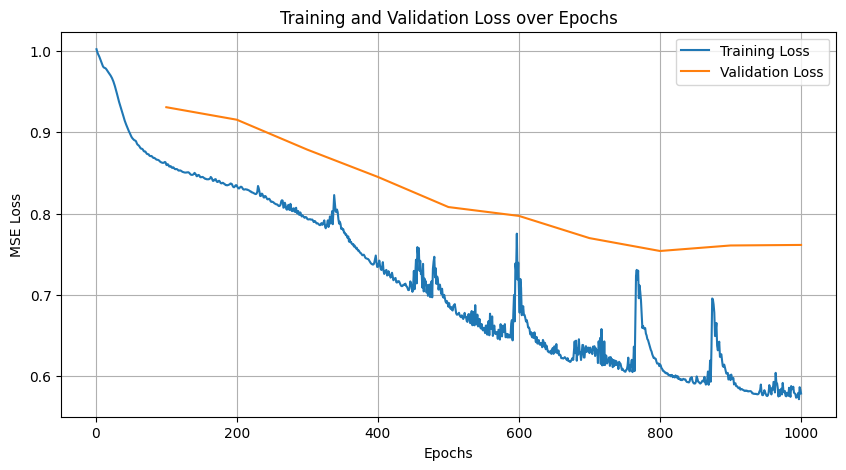

[I 2024-11-05 00:06:12,798] Trial 43 finished with value: 0.7615326642990112 and parameters: {'lr': 0.006640132931953355, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.006982049420442515


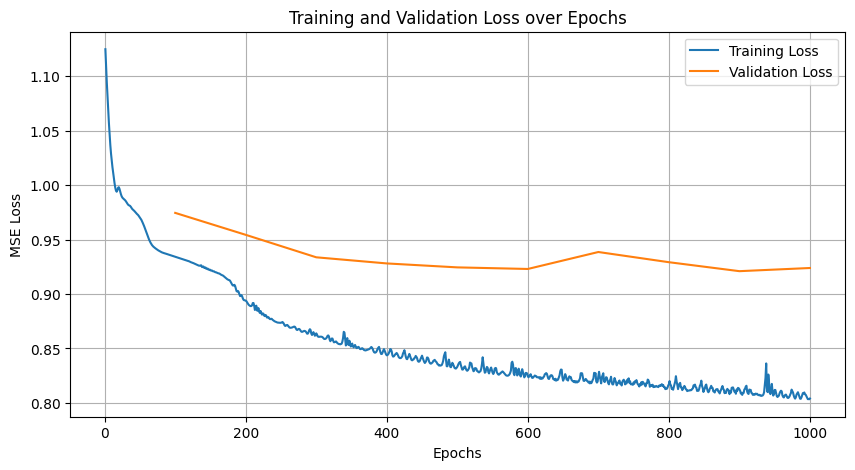

[I 2024-11-05 00:06:18,791] Trial 44 finished with value: 0.9238834977149963 and parameters: {'lr': 0.006982049420442515, 'num_layers': 6, 'hidden_size': 13}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.005142899881868167


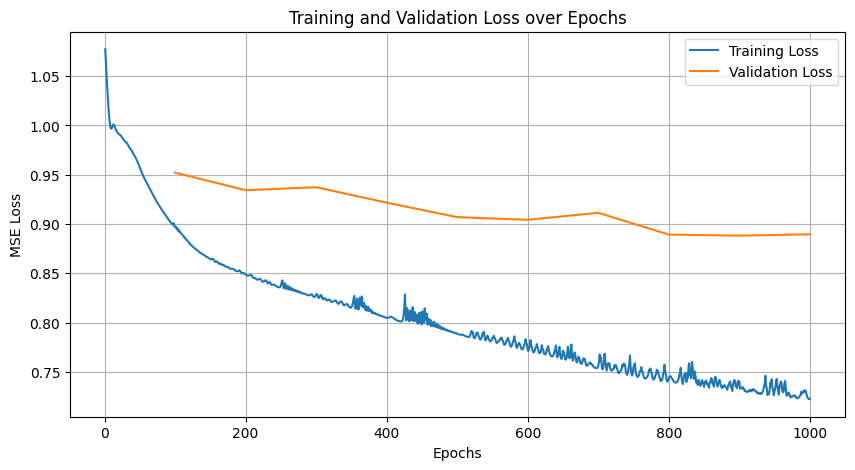

[I 2024-11-05 00:06:23,384] Trial 45 finished with value: 0.8896365165710449 and parameters: {'lr': 0.005142899881868167, 'num_layers': 5, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.006395685437727329


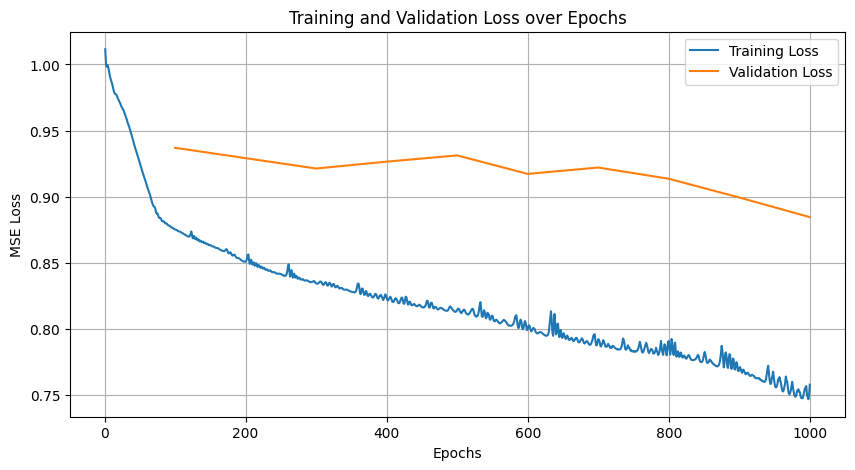

[I 2024-11-05 00:06:27,362] Trial 46 finished with value: 0.8844736218452454 and parameters: {'lr': 0.006395685437727329, 'num_layers': 4, 'hidden_size': 12}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  5.563714488432896e-05


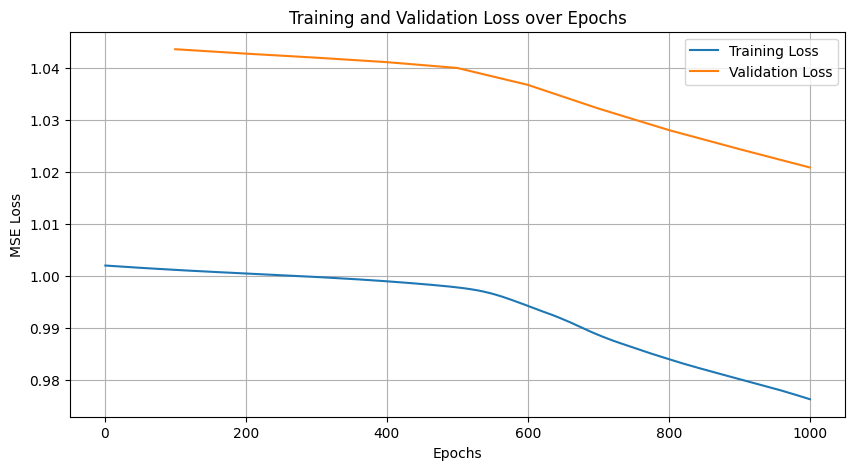

[I 2024-11-05 00:06:32,599] Trial 47 finished with value: 1.0208462476730347 and parameters: {'lr': 5.563714488432896e-05, 'num_layers': 5, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0023466432520327213


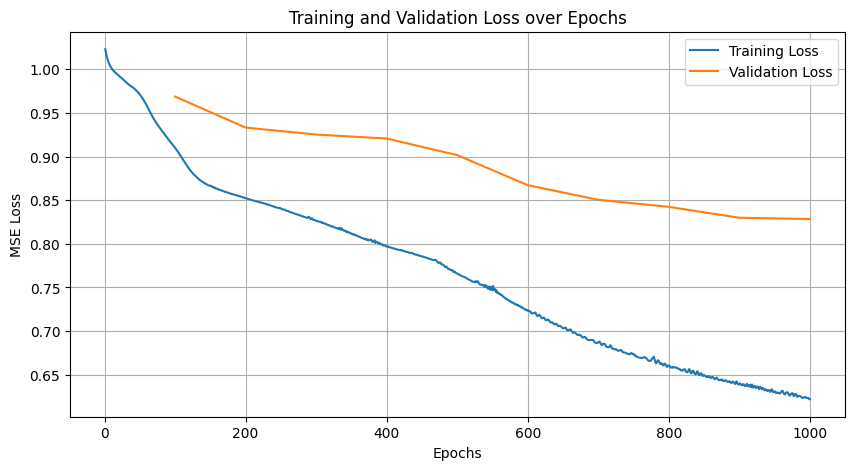

[I 2024-11-05 00:06:36,073] Trial 48 finished with value: 0.8283689618110657 and parameters: {'lr': 0.0023466432520327213, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.009021302284656746


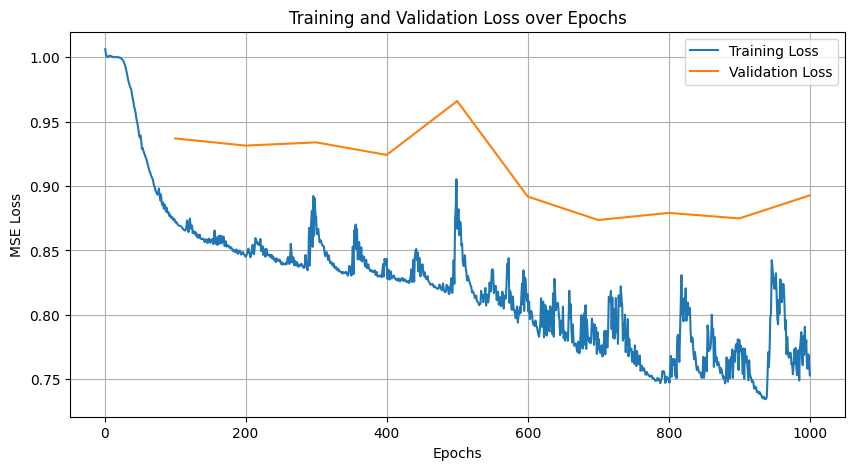

[I 2024-11-05 00:06:43,268] Trial 49 finished with value: 0.8927118182182312 and parameters: {'lr': 0.009021302284656746, 'num_layers': 7, 'hidden_size': 14}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0021259000433856983


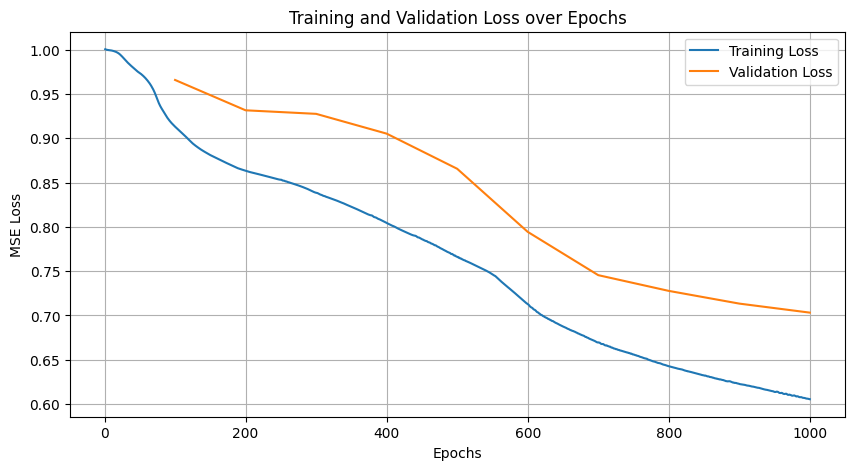

[I 2024-11-05 00:06:46,837] Trial 50 finished with value: 0.7032178044319153 and parameters: {'lr': 0.0021259000433856983, 'num_layers': 4, 'hidden_size': 12}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0021701143858247145


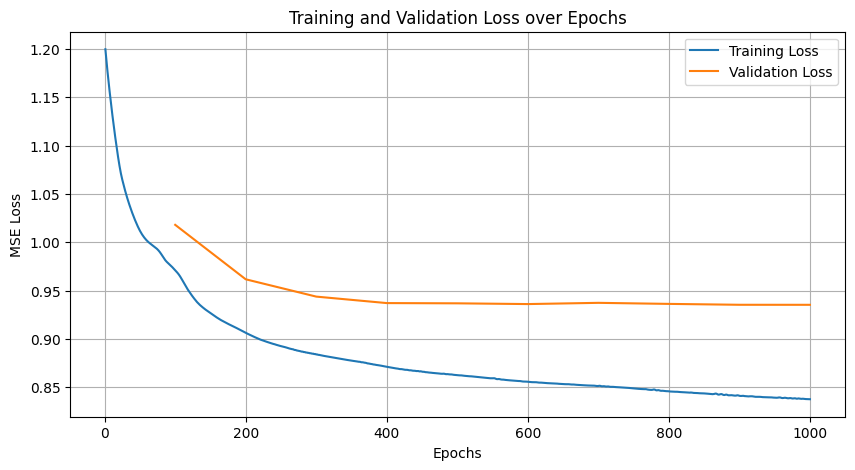

[I 2024-11-05 00:06:50,313] Trial 51 finished with value: 0.9353119134902954 and parameters: {'lr': 0.0021701143858247145, 'num_layers': 4, 'hidden_size': 11}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.004224031393353411


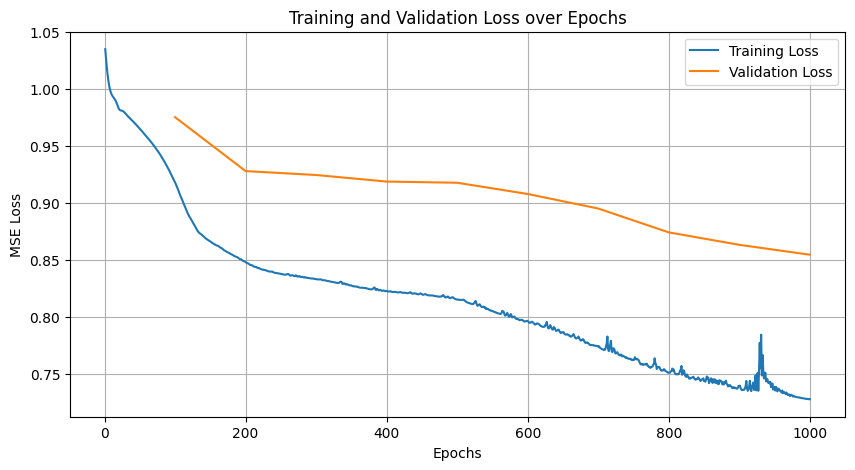

[I 2024-11-05 00:06:53,970] Trial 52 finished with value: 0.8544248938560486 and parameters: {'lr': 0.004224031393353411, 'num_layers': 4, 'hidden_size': 10}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0061859880889156465


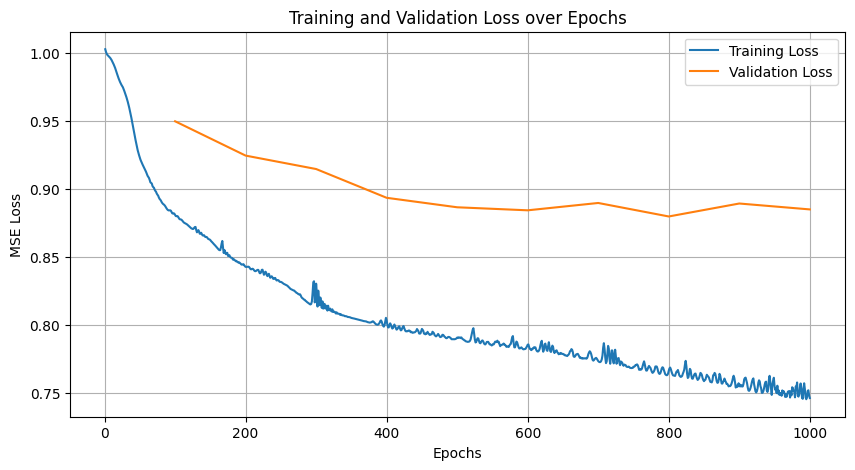

[I 2024-11-05 00:06:58,491] Trial 53 finished with value: 0.8850100636482239 and parameters: {'lr': 0.0061859880889156465, 'num_layers': 4, 'hidden_size': 13}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0028394689488147207


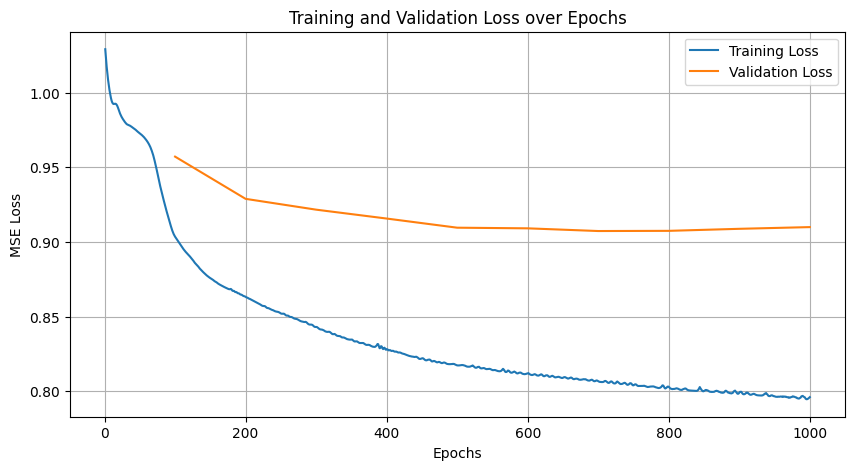

[I 2024-11-05 00:07:01,946] Trial 54 finished with value: 0.9099042415618896 and parameters: {'lr': 0.0028394689488147207, 'num_layers': 4, 'hidden_size': 12}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.001391525224036723


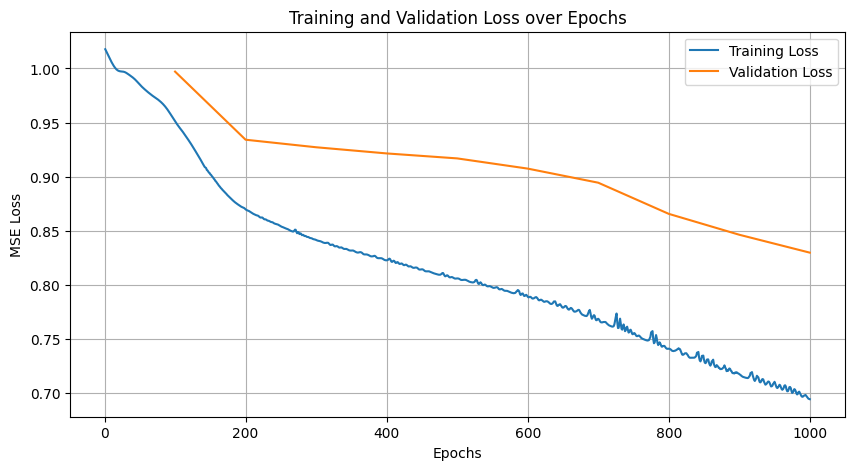

[I 2024-11-05 00:07:08,323] Trial 55 finished with value: 0.8296087980270386 and parameters: {'lr': 0.001391525224036723, 'num_layers': 6, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.001823487793743792


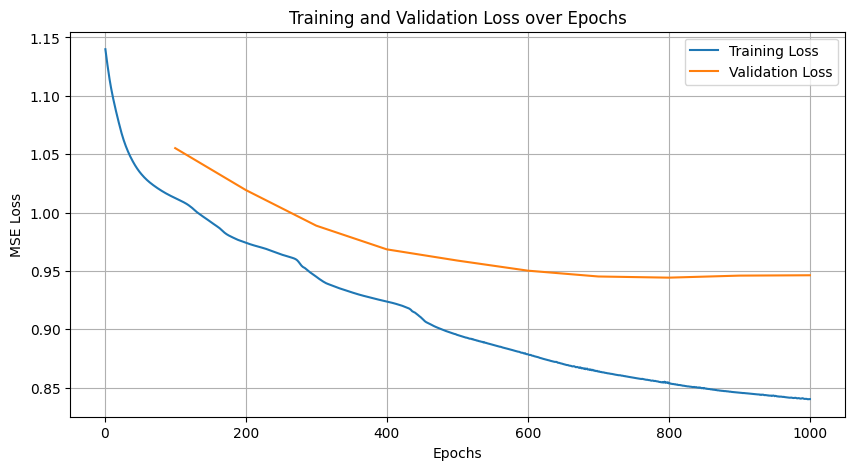

[I 2024-11-05 00:07:12,472] Trial 56 finished with value: 0.9462465643882751 and parameters: {'lr': 0.001823487793743792, 'num_layers': 4, 'hidden_size': 11}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.007833309526274168


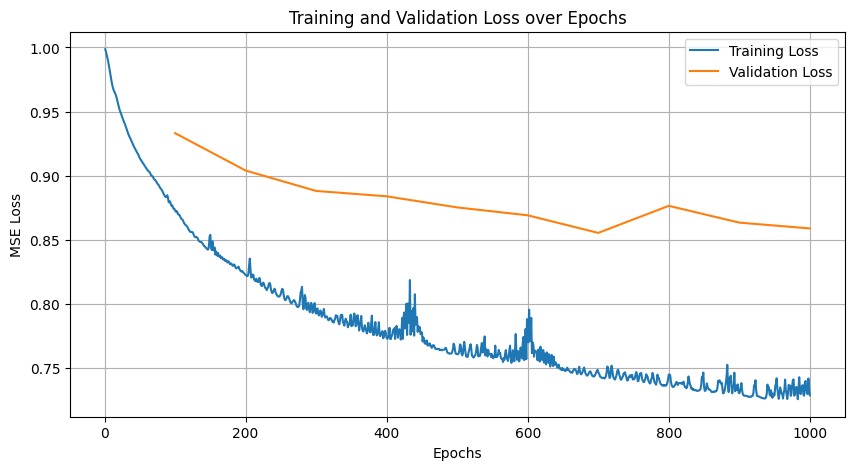

[I 2024-11-05 00:07:15,968] Trial 57 finished with value: 0.8589021563529968 and parameters: {'lr': 0.007833309526274168, 'num_layers': 4, 'hidden_size': 12}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.009941923413088057


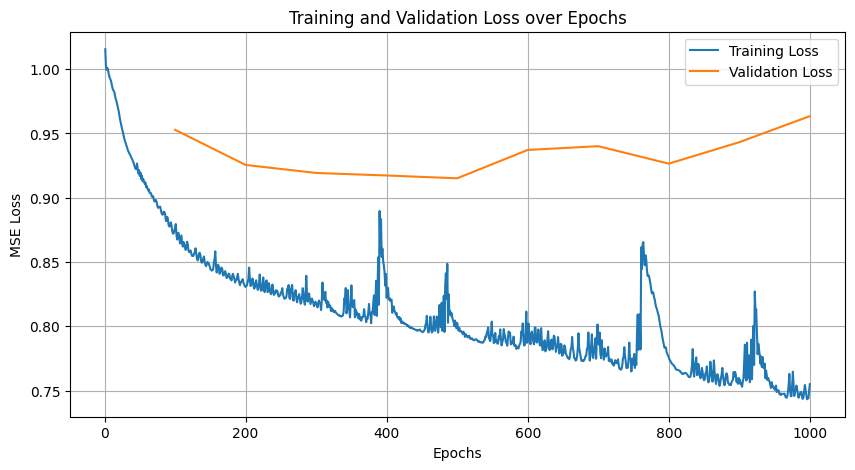

[I 2024-11-05 00:07:19,981] Trial 58 finished with value: 0.9634222984313965 and parameters: {'lr': 0.009941923413088057, 'num_layers': 5, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0008263094563301084


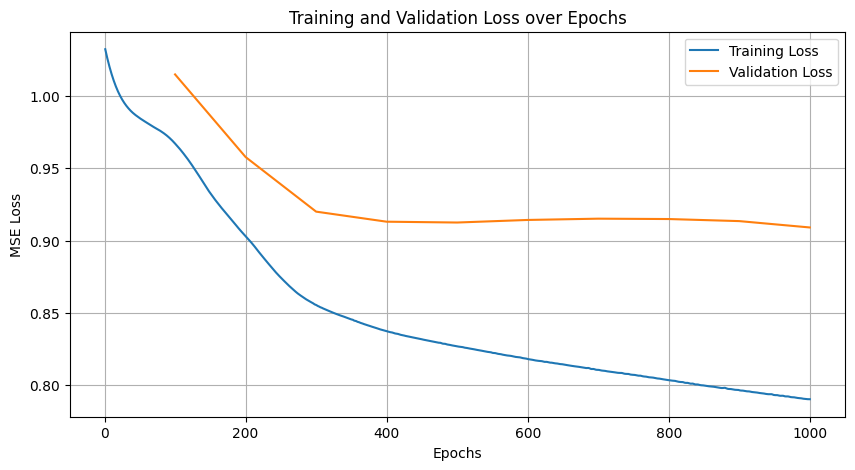

[I 2024-11-05 00:07:25,559] Trial 59 finished with value: 0.9091322422027588 and parameters: {'lr': 0.0008263094563301084, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.004345114657954324


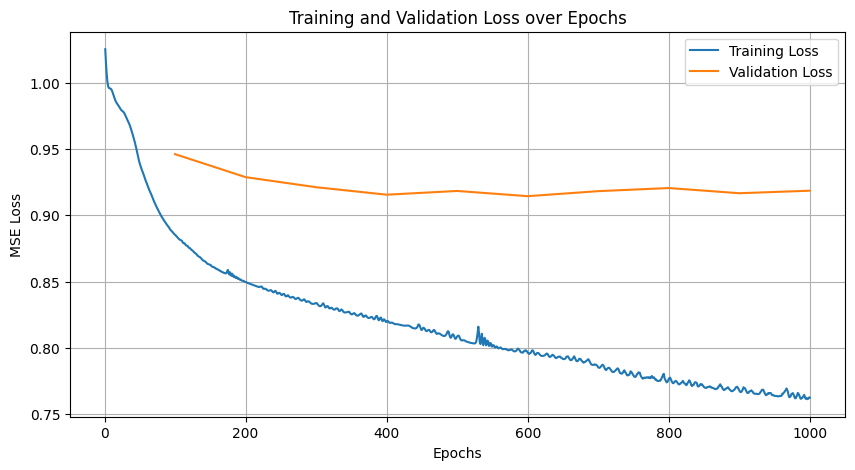

[I 2024-11-05 00:07:29,446] Trial 60 finished with value: 0.9185114502906799 and parameters: {'lr': 0.004345114657954324, 'num_layers': 4, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0029725982946881765


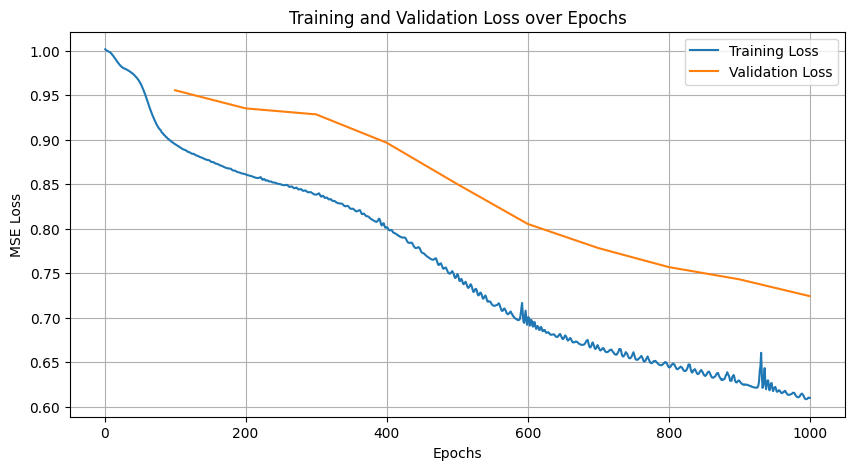

[I 2024-11-05 00:07:32,896] Trial 61 finished with value: 0.7241388559341431 and parameters: {'lr': 0.0029725982946881765, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0029158385149120605


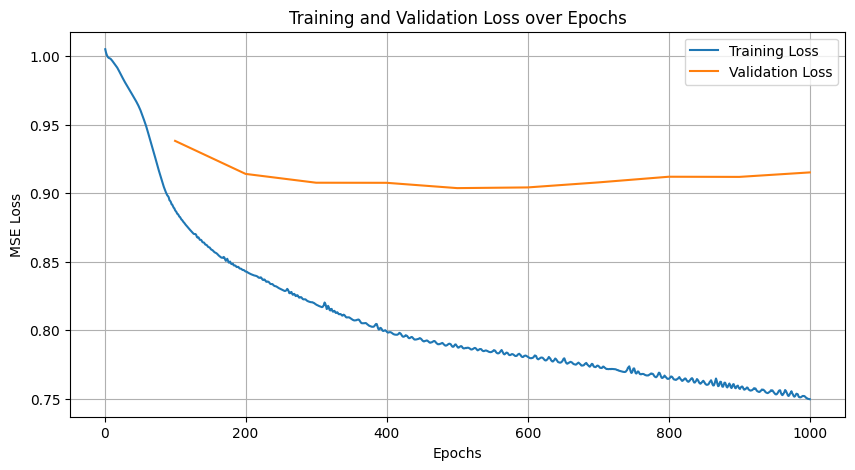

[I 2024-11-05 00:07:37,601] Trial 62 finished with value: 0.9151652455329895 and parameters: {'lr': 0.0029158385149120605, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0021273416909733016


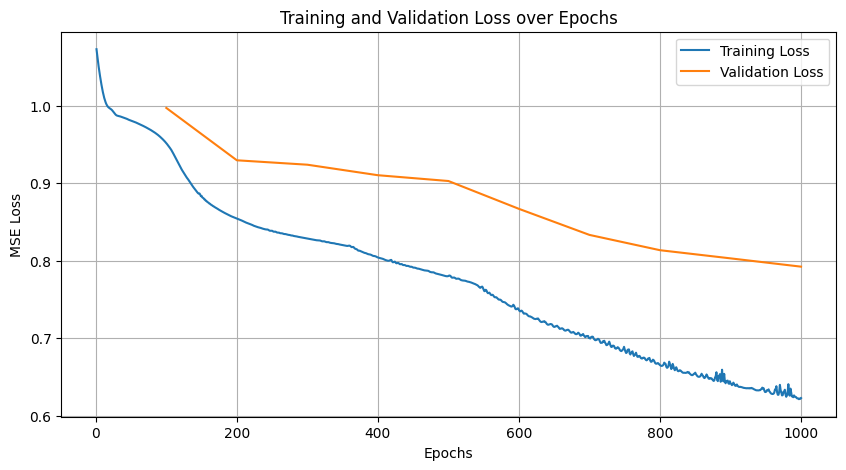

[I 2024-11-05 00:07:41,764] Trial 63 finished with value: 0.79221510887146 and parameters: {'lr': 0.0021273416909733016, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.005074969192532303


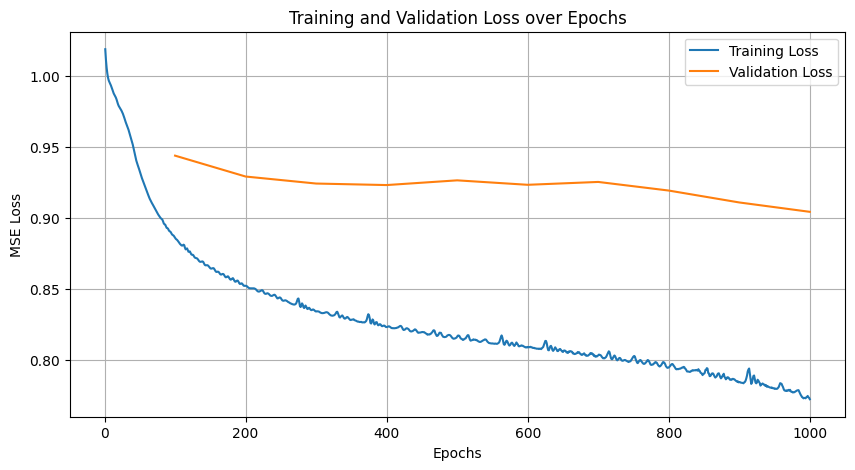

[I 2024-11-05 00:07:45,619] Trial 64 finished with value: 0.9044688940048218 and parameters: {'lr': 0.005074969192532303, 'num_layers': 4, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0011277238529857573


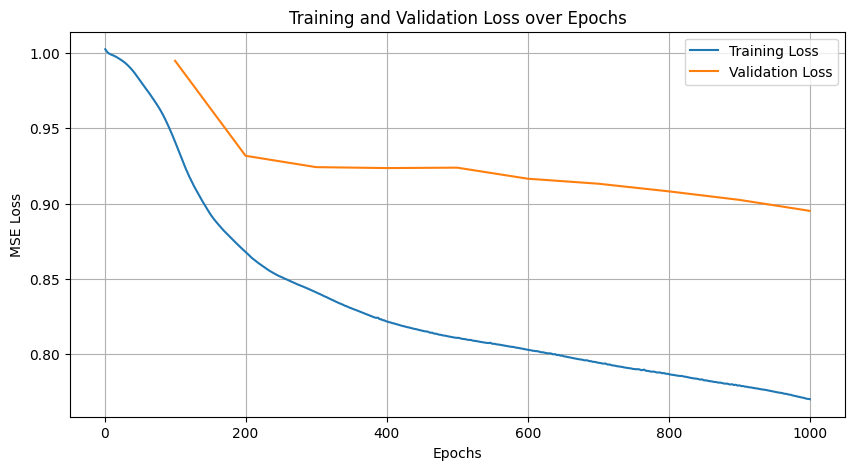

[I 2024-11-05 00:07:49,687] Trial 65 finished with value: 0.8951413631439209 and parameters: {'lr': 0.0011277238529857573, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.004042693140080624


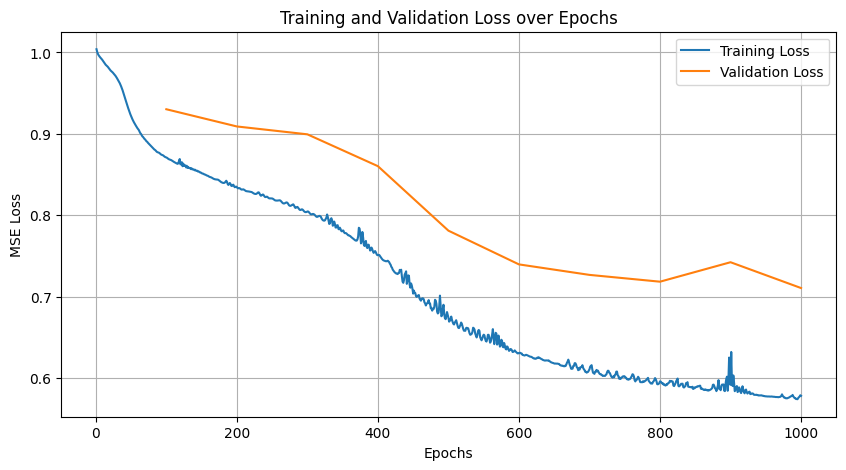

[I 2024-11-05 00:07:54,387] Trial 66 finished with value: 0.7105764150619507 and parameters: {'lr': 0.004042693140080624, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.003932655545522247


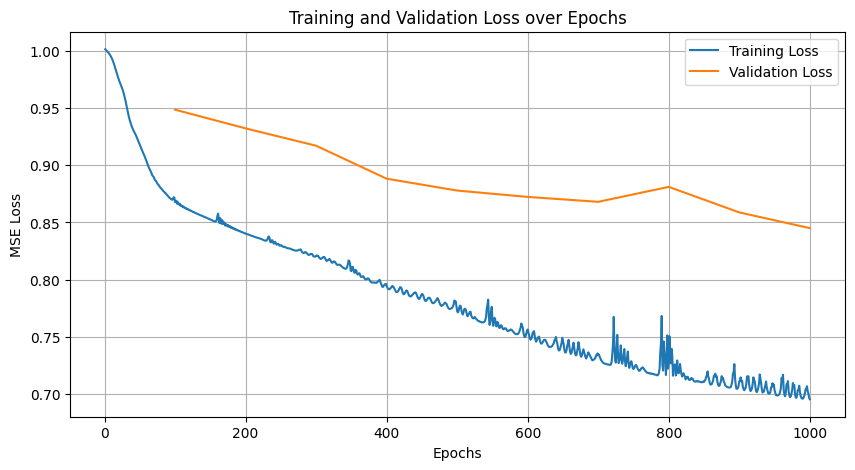

[I 2024-11-05 00:07:58,525] Trial 67 finished with value: 0.8450530171394348 and parameters: {'lr': 0.003932655545522247, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.002624152467008201


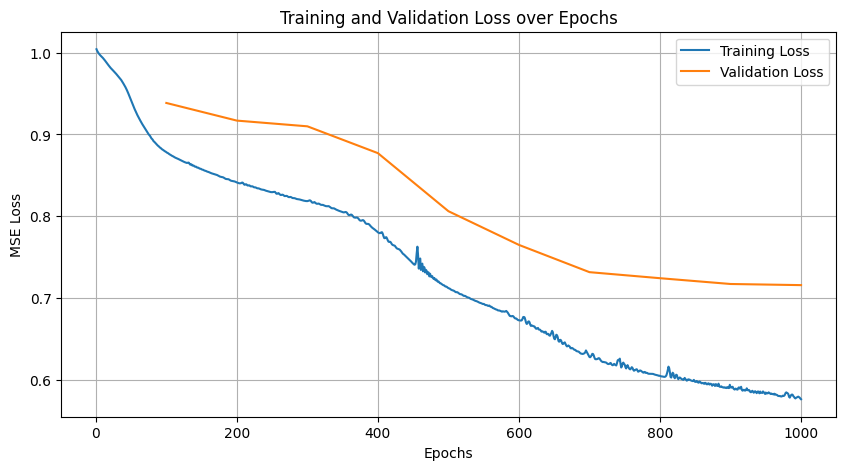

[I 2024-11-05 00:08:03,433] Trial 68 finished with value: 0.7159034013748169 and parameters: {'lr': 0.002624152467008201, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0017614363813485297


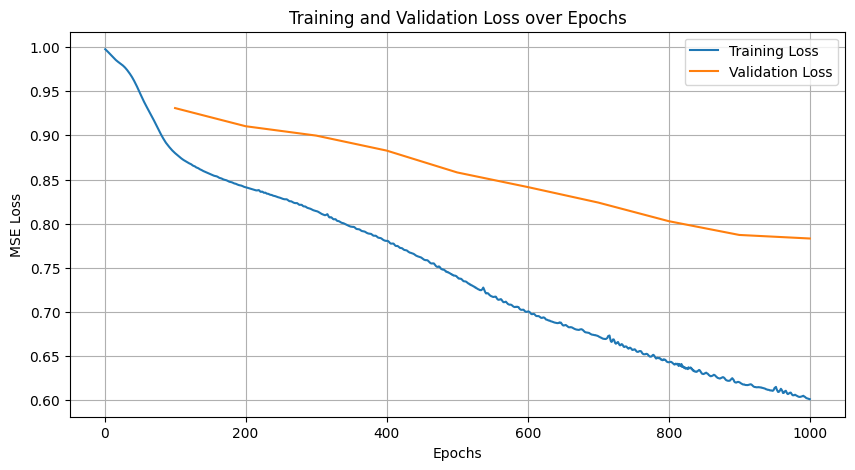

[I 2024-11-05 00:08:08,523] Trial 69 finished with value: 0.7832154631614685 and parameters: {'lr': 0.0017614363813485297, 'num_layers': 4, 'hidden_size': 19}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.000331259384930976


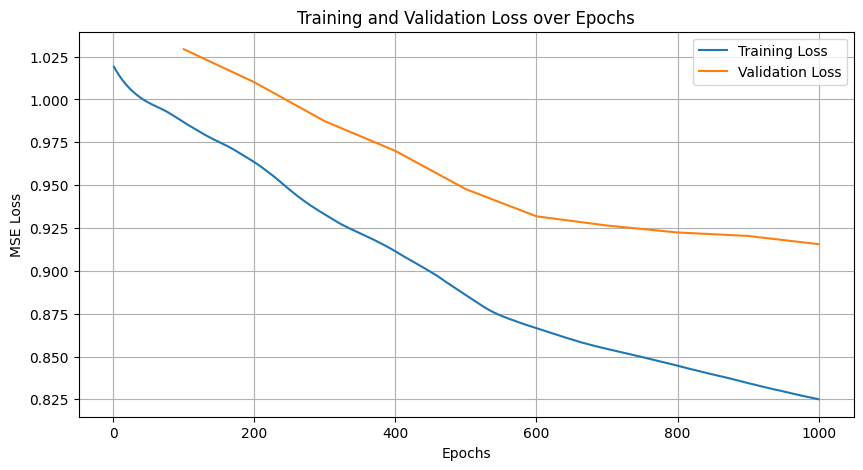

[I 2024-11-05 00:08:12,812] Trial 70 finished with value: 0.9155678749084473 and parameters: {'lr': 0.000331259384930976, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.002487758226803111


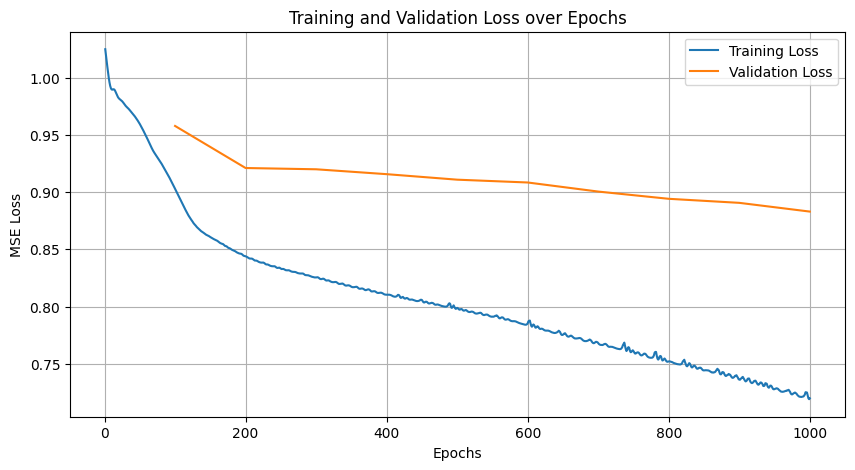

[I 2024-11-05 00:08:18,255] Trial 71 finished with value: 0.8829981684684753 and parameters: {'lr': 0.002487758226803111, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0032249083896832543


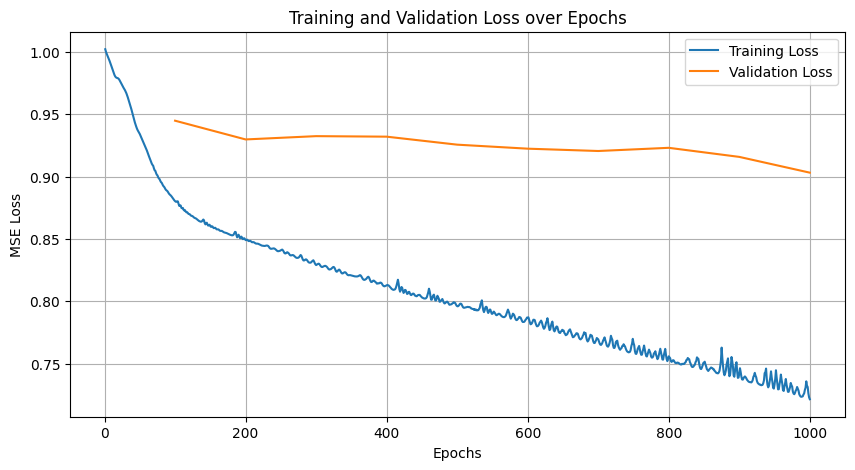

[I 2024-11-05 00:08:22,936] Trial 72 finished with value: 0.9030867218971252 and parameters: {'lr': 0.0032249083896832543, 'num_layers': 4, 'hidden_size': 20}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.002695564988127451


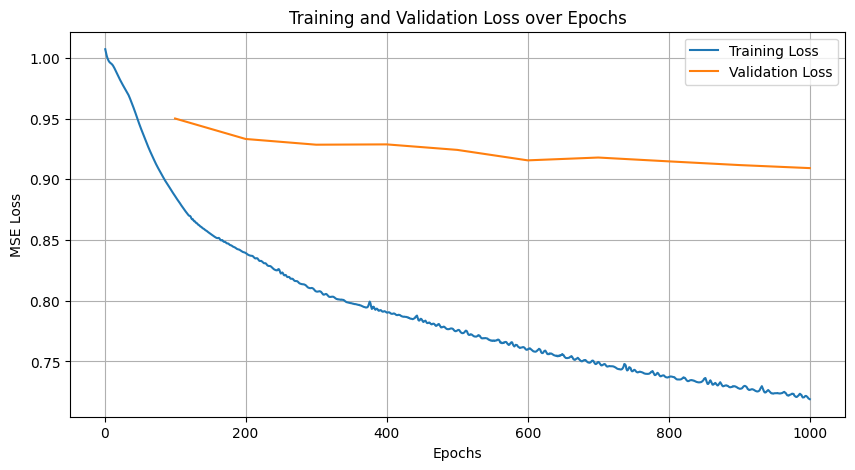

[I 2024-11-05 00:08:27,096] Trial 73 finished with value: 0.9091933369636536 and parameters: {'lr': 0.002695564988127451, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.005163773943949926


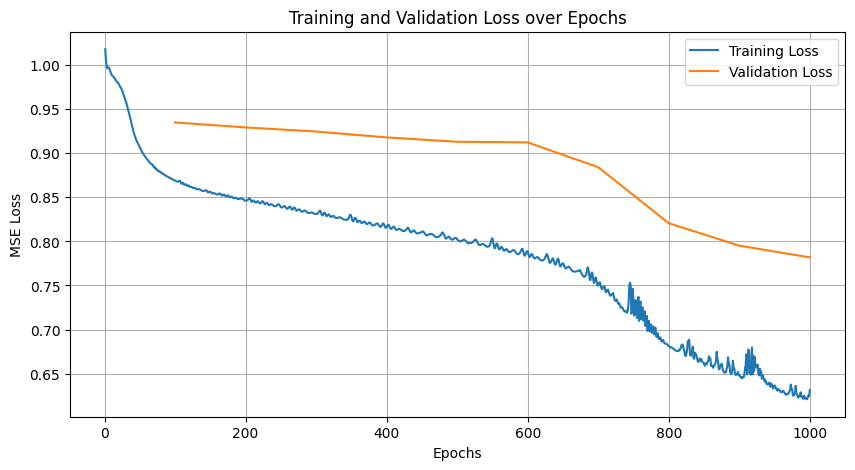

[I 2024-11-05 00:08:32,821] Trial 74 finished with value: 0.7818673849105835 and parameters: {'lr': 0.005163773943949926, 'num_layers': 4, 'hidden_size': 19}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.004053489476543024


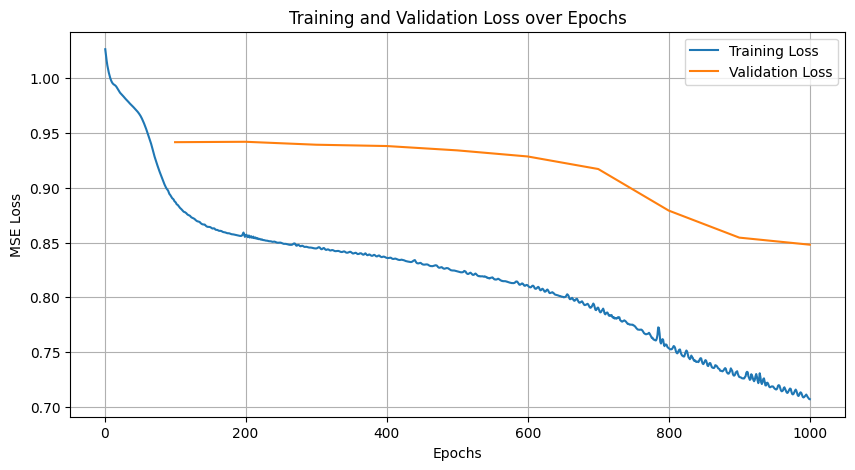

[I 2024-11-05 00:08:36,294] Trial 75 finished with value: 0.8480138778686523 and parameters: {'lr': 0.004053489476543024, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0013154084193599015


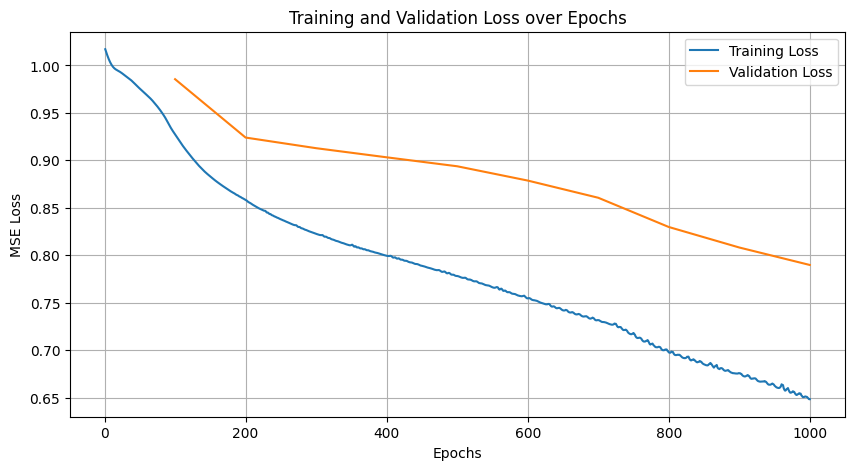

[I 2024-11-05 00:08:40,863] Trial 76 finished with value: 0.7898154258728027 and parameters: {'lr': 0.0013154084193599015, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0019904958839110356


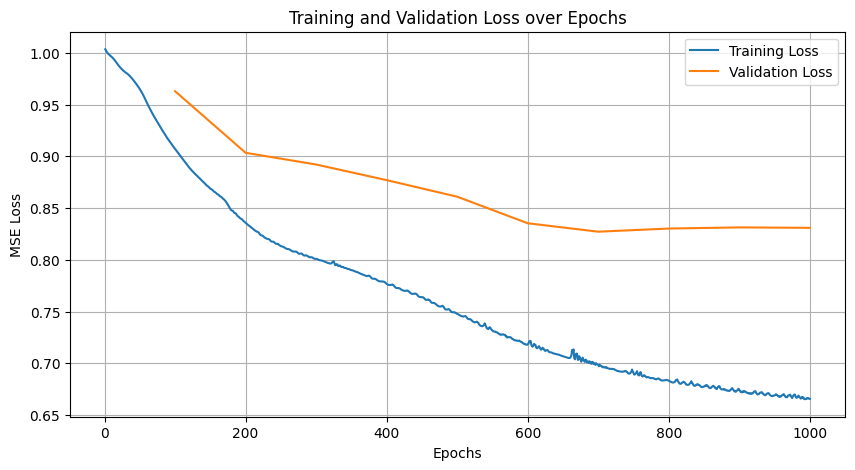

[I 2024-11-05 00:08:47,903] Trial 77 finished with value: 0.8308390974998474 and parameters: {'lr': 0.0019904958839110356, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  1.98375777100353e-05


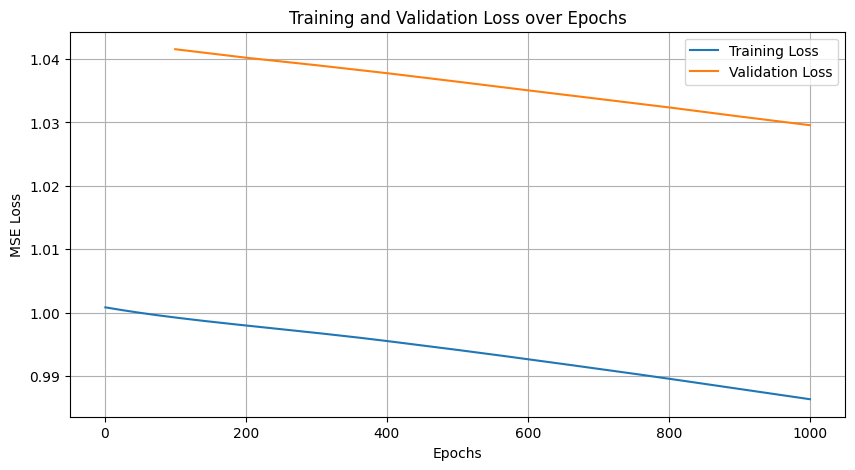

[I 2024-11-05 00:08:52,073] Trial 78 finished with value: 1.0295636653900146 and parameters: {'lr': 1.98375777100353e-05, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0009899633329858812


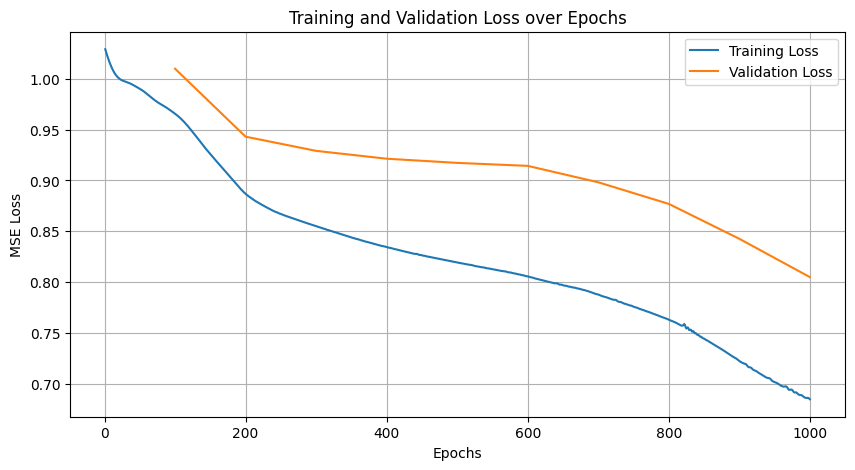

[I 2024-11-05 00:08:55,542] Trial 79 finished with value: 0.8050897717475891 and parameters: {'lr': 0.0009899633329858812, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0002596294819370471


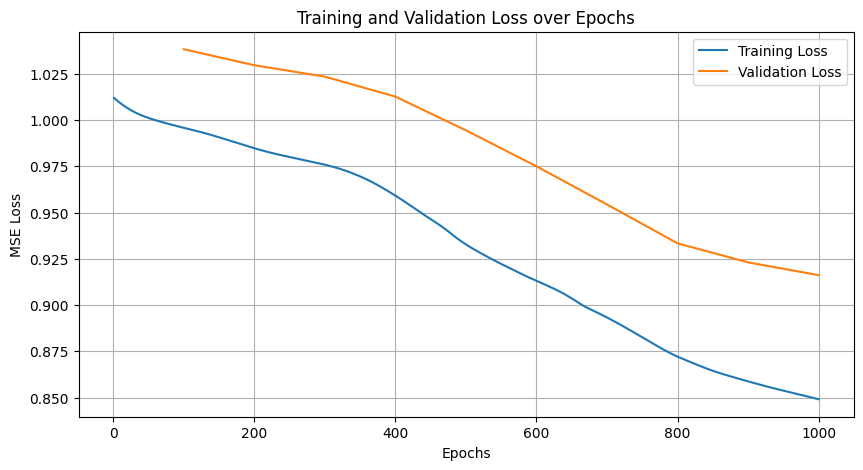

[I 2024-11-05 00:09:00,584] Trial 80 finished with value: 0.9161669611930847 and parameters: {'lr': 0.0002596294819370471, 'num_layers': 4, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.007579504206306723


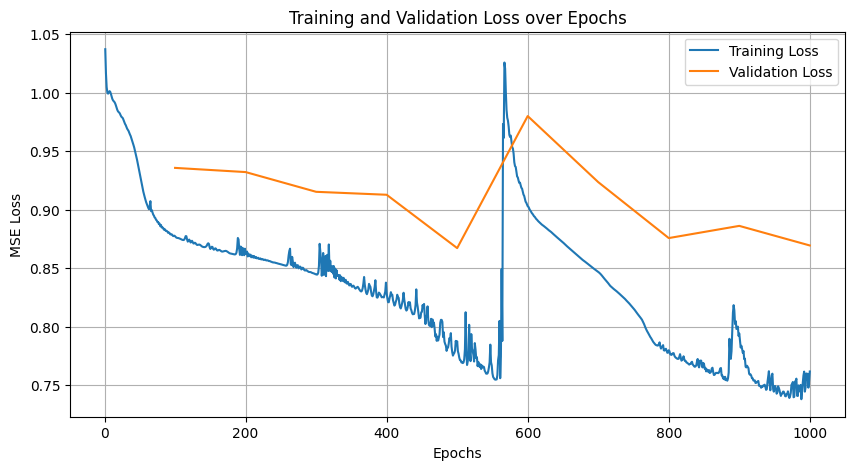

[I 2024-11-05 00:09:04,987] Trial 81 finished with value: 0.8694630265235901 and parameters: {'lr': 0.007579504206306723, 'num_layers': 5, 'hidden_size': 14}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.005988009461683969


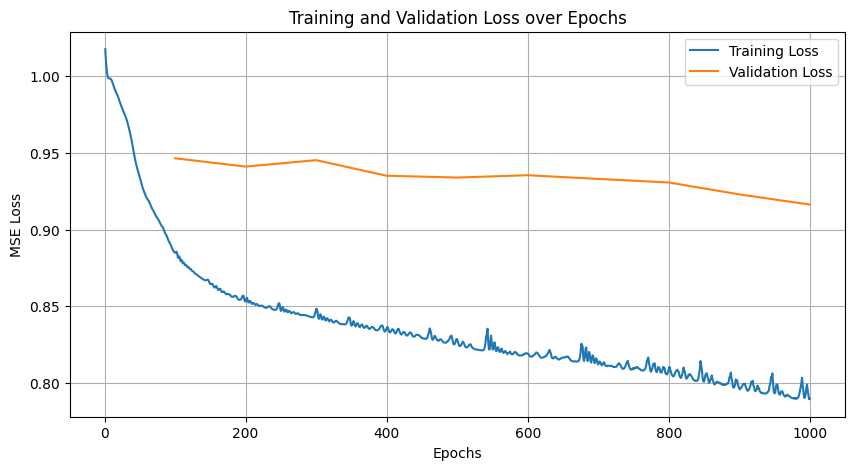

[I 2024-11-05 00:09:08,866] Trial 82 finished with value: 0.9162794351577759 and parameters: {'lr': 0.005988009461683969, 'num_layers': 4, 'hidden_size': 15}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.003590728463848655


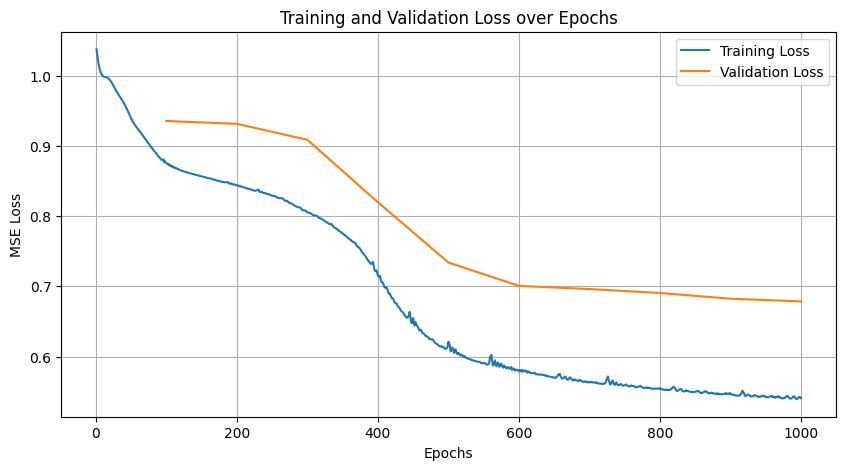

[I 2024-11-05 00:09:13,457] Trial 83 finished with value: 0.6786225438117981 and parameters: {'lr': 0.003590728463848655, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.002980473524005361


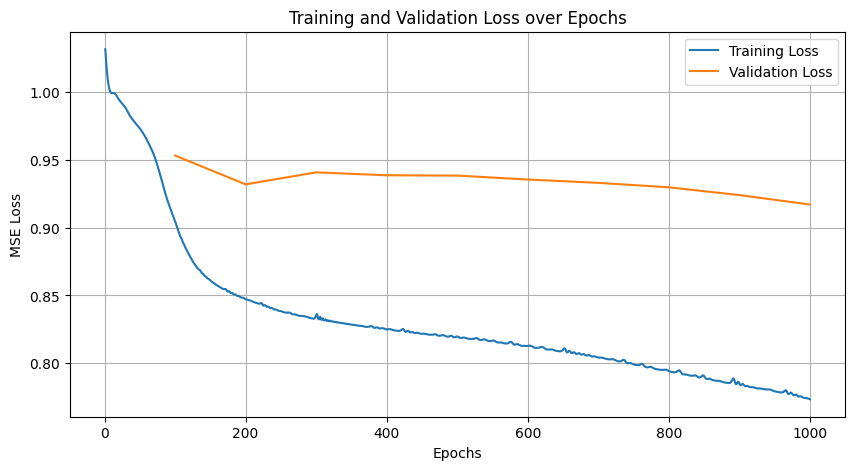

[I 2024-11-05 00:09:17,010] Trial 84 finished with value: 0.9170600771903992 and parameters: {'lr': 0.002980473524005361, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0038821303582492117


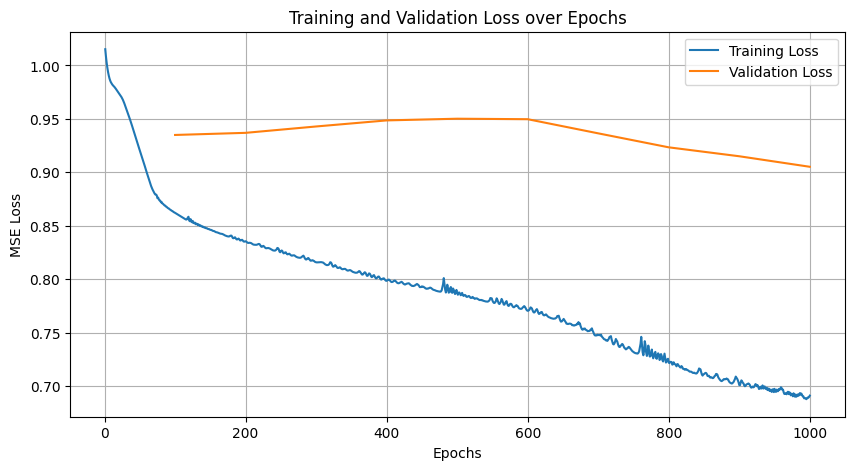

[I 2024-11-05 00:09:20,414] Trial 85 finished with value: 0.9051473140716553 and parameters: {'lr': 0.0038821303582492117, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.00462745284480653


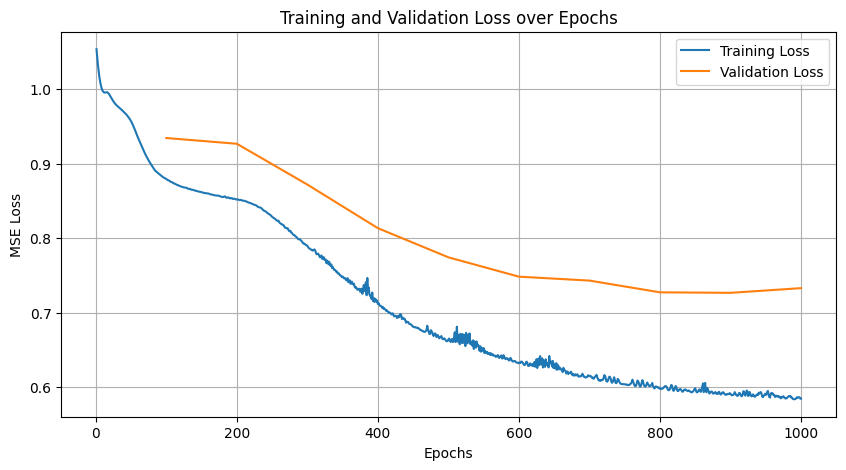

[I 2024-11-05 00:09:24,989] Trial 86 finished with value: 0.7329352498054504 and parameters: {'lr': 0.00462745284480653, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0016421285893801747


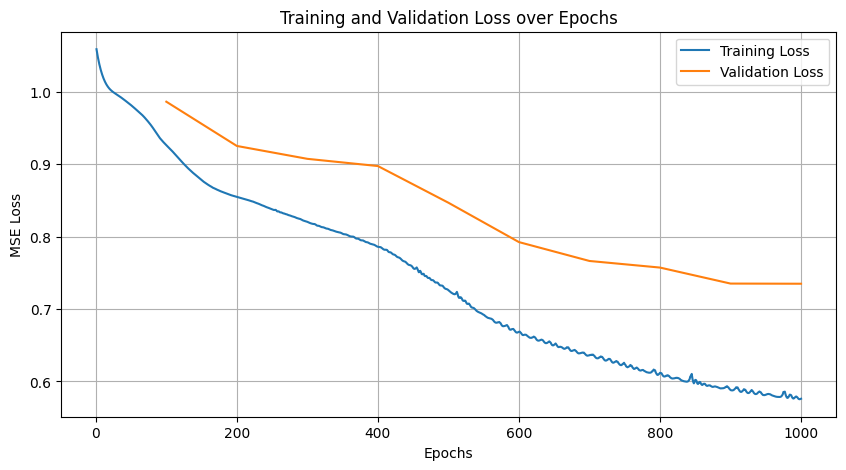

[I 2024-11-05 00:09:30,064] Trial 87 finished with value: 0.7349597811698914 and parameters: {'lr': 0.0016421285893801747, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0015727756216115437


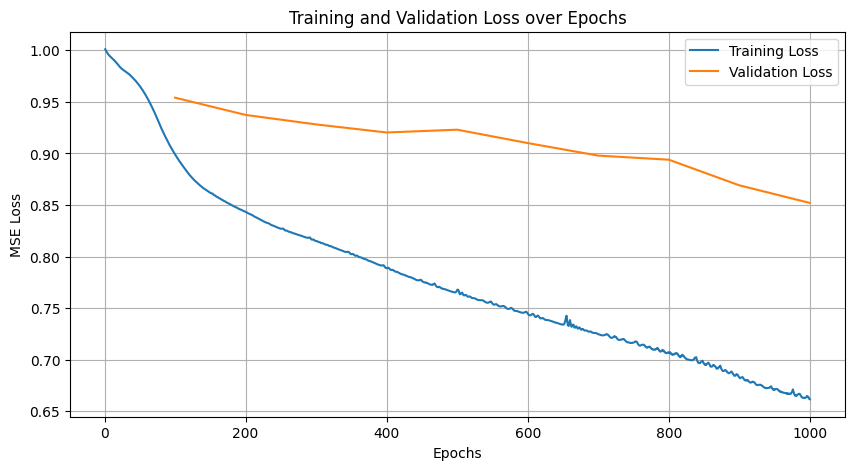

[I 2024-11-05 00:09:34,352] Trial 88 finished with value: 0.8519947528839111 and parameters: {'lr': 0.0015727756216115437, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.002435460490740982


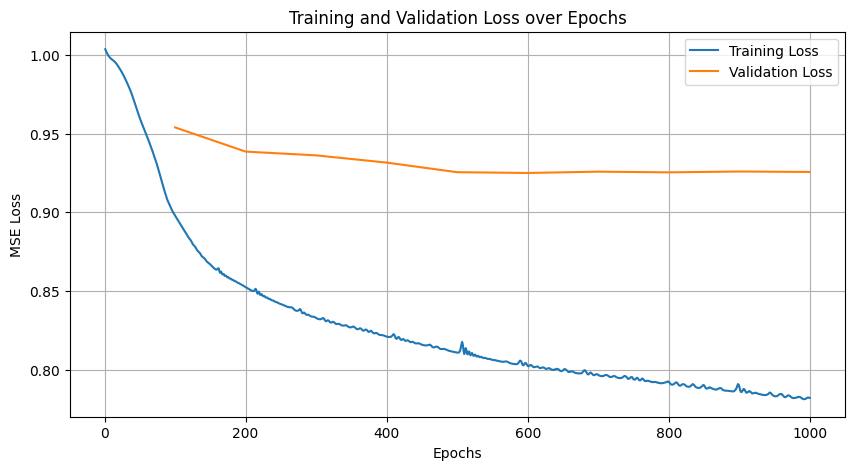

[I 2024-11-05 00:09:39,091] Trial 89 finished with value: 0.9256490468978882 and parameters: {'lr': 0.002435460490740982, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0016793187563803812


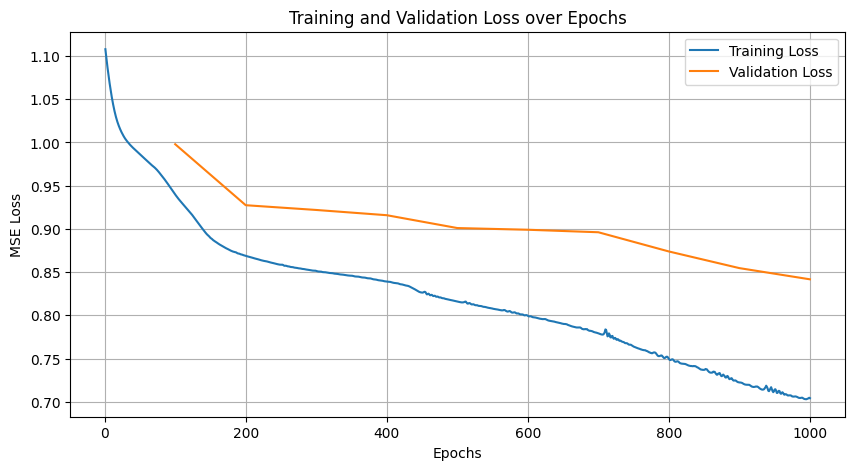

[I 2024-11-05 00:09:44,118] Trial 90 finished with value: 0.8416315317153931 and parameters: {'lr': 0.0016793187563803812, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.003463458360042078


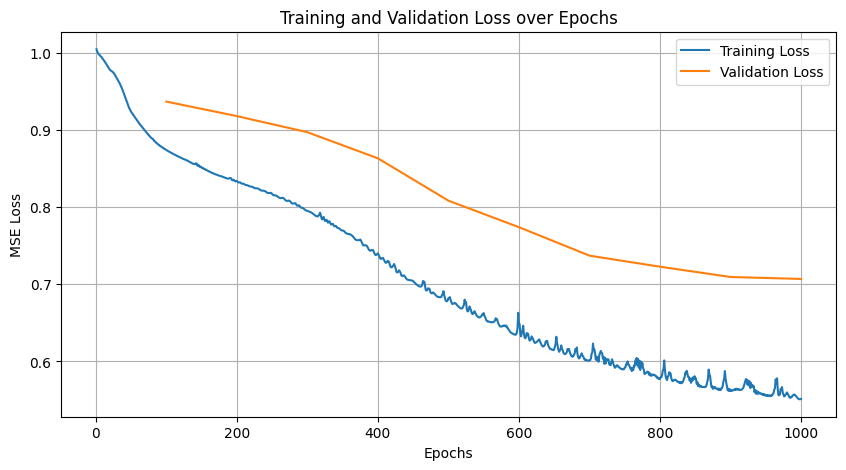

[I 2024-11-05 00:09:48,270] Trial 91 finished with value: 0.7069687843322754 and parameters: {'lr': 0.003463458360042078, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0035446419858158364


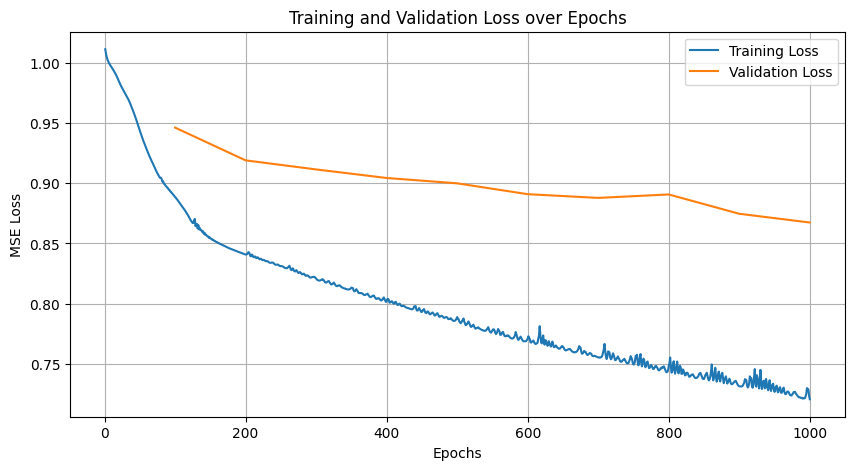

[I 2024-11-05 00:09:53,068] Trial 92 finished with value: 0.867398738861084 and parameters: {'lr': 0.0035446419858158364, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0020515811622369624


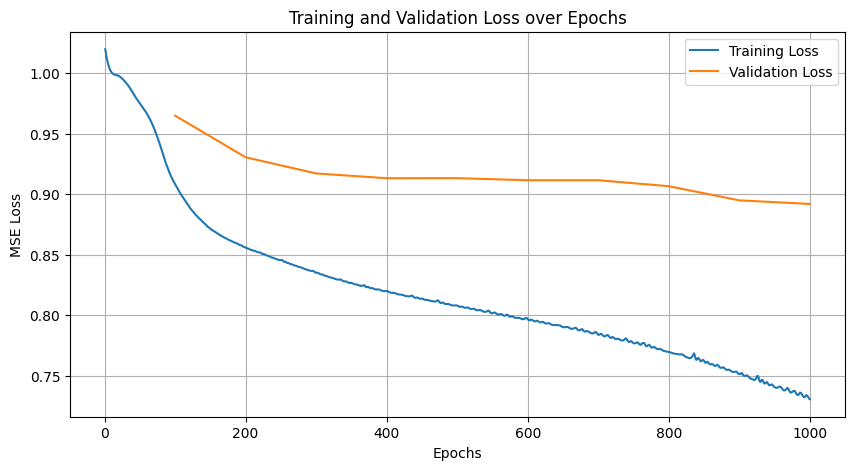

[I 2024-11-05 00:09:58,139] Trial 93 finished with value: 0.8919214606285095 and parameters: {'lr': 0.0020515811622369624, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.004465663980985372


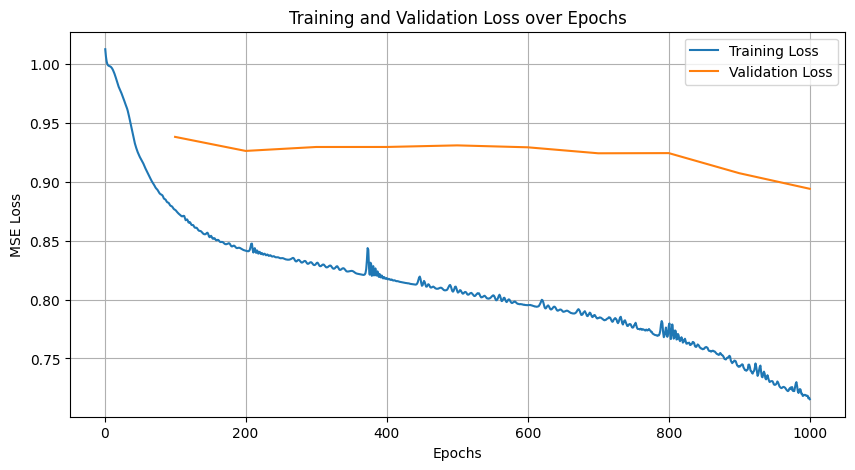

[I 2024-11-05 00:10:02,335] Trial 94 finished with value: 0.893927276134491 and parameters: {'lr': 0.004465663980985372, 'num_layers': 4, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0027330482310217955


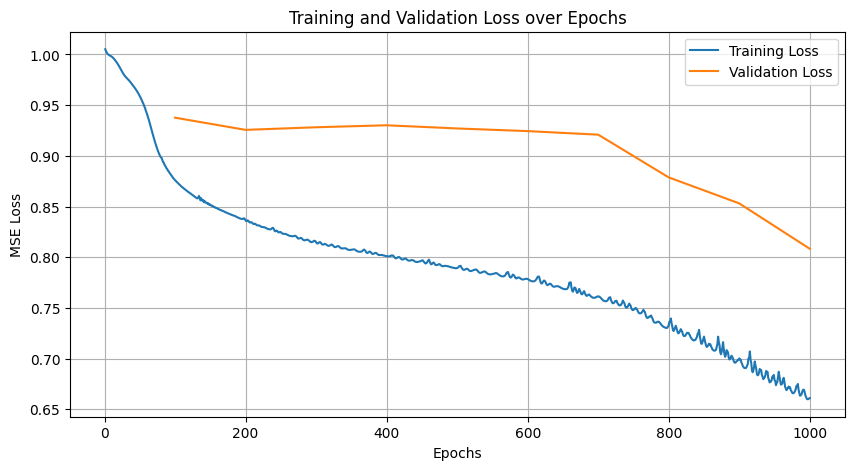

[I 2024-11-05 00:10:07,548] Trial 95 finished with value: 0.8083839416503906 and parameters: {'lr': 0.0027330482310217955, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0006576153253302448


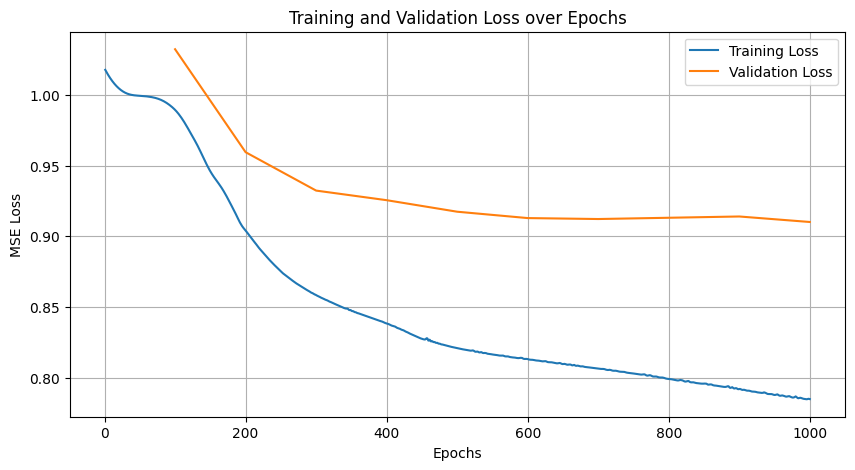

[I 2024-11-05 00:10:14,795] Trial 96 finished with value: 0.9101637601852417 and parameters: {'lr': 0.0006576153253302448, 'num_layers': 7, 'hidden_size': 17}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0033956063635620587


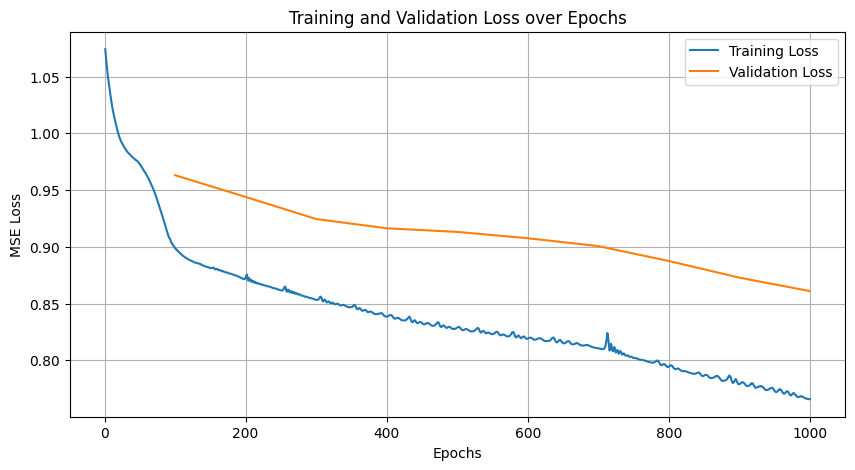

[I 2024-11-05 00:10:18,188] Trial 97 finished with value: 0.8609737157821655 and parameters: {'lr': 0.0033956063635620587, 'num_layers': 4, 'hidden_size': 16}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.005623909017495923


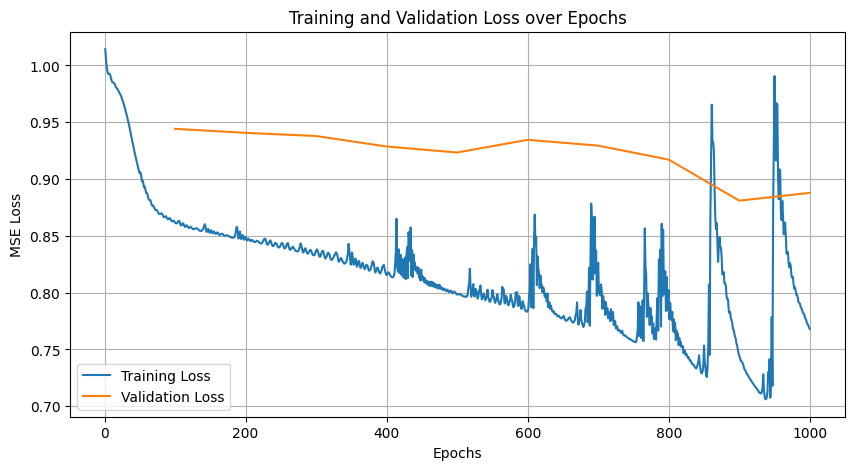

[I 2024-11-05 00:10:24,077] Trial 98 finished with value: 0.8878158330917358 and parameters: {'lr': 0.005623909017495923, 'num_layers': 4, 'hidden_size': 19}. Best is trial 26 with value: 0.6633238196372986.


Learning Rate:  0.0025258064182286126


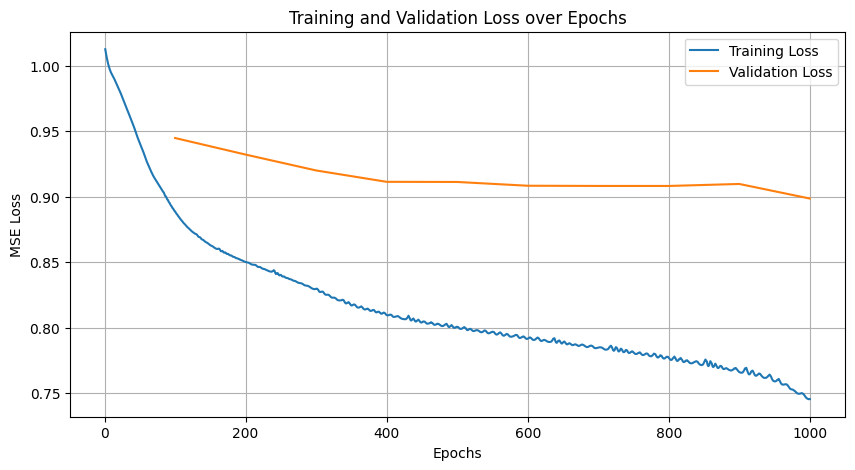

[I 2024-11-05 00:10:28,409] Trial 99 finished with value: 0.8984732031822205 and parameters: {'lr': 0.0025258064182286126, 'num_layers': 4, 'hidden_size': 18}. Best is trial 26 with value: 0.6633238196372986.


Best hyperparameters:  {'lr': 0.0029625199719290514, 'num_layers': 4, 'hidden_size': 15}


In [76]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True

class TrafficModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(TrafficModel, self).__init__()
        layers = []
        in_size = input_size
        for h in hidden_sizes:
            layers.append(nn.Linear(in_size, h))
            layers.append(nn.ReLU())
            in_size = h
        layers.append(nn.Linear(in_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


def objective(trial):
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    num_layers = trial.suggest_int('num_layers', 4, 7)
    hidden_size = trial.suggest_int('hidden_size', 10, 20)

    model = TrafficModel(input_size=X_train.shape[1], hidden_sizes=[hidden_size] * num_layers, output_size=1)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    for epoch in range(1000):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_test_tensor)
                val_loss = criterion(val_outputs, y_test_tensor)
                val_losses.append(val_loss.item())

    print("Learning Rate: ",lr)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(100, len(train_losses) + 1, 100), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title('Training and Validation Loss over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

    return val_losses[-1]

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Best hyperparameters: ", study.best_params)


# **Los mejores hiperparámetros serían:**

learning rate: 0.002

número de capas ocultas: 4

número de neuronas por capa:  15

Learning Rate:  0.0029625199719290514


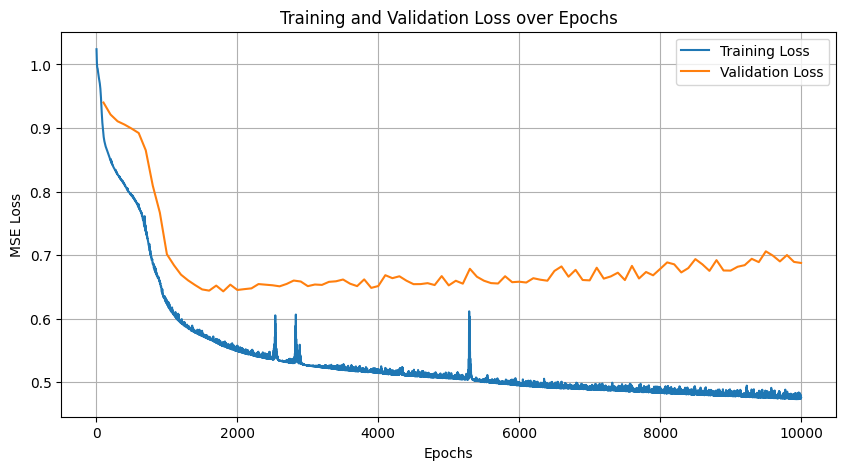

0.6875585913658142

In [100]:
lr = 0.0029625199719290514
num_layers = 4
hidden_size = 15

model = TrafficModel(input_size=X_train.shape[1], hidden_sizes=[hidden_size] * num_layers, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

train_losses = []
val_losses = []

for epoch in range(10000):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    train_losses.append(loss.item())
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_tensor)
            val_loss = criterion(val_outputs, y_test_tensor)
            val_losses.append(val_loss.item())

print("Learning Rate: ",lr)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(100, len(train_losses) + 1, 100), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid()
plt.show()
val_losses[-1]